---
title: "Global data on sustainable energy"
author: "Erick Borda"
date: "2023-11-03"
output: pdf_document
---

# **Britis Airways - Airline Review**

## **Domain problem**

The "Airline_Review" dataset covering 2014 to 2023 offers insights into British Airways' customer experiences, vital for service improvement. Analyzing online reviews presents challenges like unstructured data and inaccuracies, necessitating preliminary steps like Exploratory Data Analysis (EDA) for accurate analysis. Addressing missing data and mixed information in columns, leveraging the "Review_content" column for filling gaps using sentiment analysis or regular expressions is key. British Airways can optimize services based on feedback, adapting to seasonality for strategic adjustments in staffing and service customization. This dataset is essential for British Airways to evolve and excel in customer satisfaction, turning each flight into a resonant passenger experience.


## 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:/Proyectos/notebooks/big_data/assessment/Airline_Review.csv')

In [3]:
df.head()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure


## **2. Exploratory Data Analysis (EDA).**

Exploratory Data Analysis (EDA) marks the primary phase of analysing data. It involves uncovering insights into the dataset's contents, characteristics, and size

### **2.1. Data types and dimensions**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  3580 non-null   object 
 1   Flying_month    2815 non-null   object 
 2   Route           2816 non-null   object 
 3   Rating          3575 non-null   float64
 4   Verified        1270 non-null   object 
 5   Review_title    3580 non-null   object 
 6   Review_content  3580 non-null   object 
 7   Traveller_type  3580 non-null   object 
 8   Class           3579 non-null   object 
dtypes: float64(1), object(8)
memory usage: 251.8+ KB


### **2.2. Descriptive statistics**

#### **2.2.1. Numerical columns**

In [5]:
df.describe()

,Rating
count,3575.000000
mean,4.790490
std,3.170323
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


#### **2.2.2. Categorical columns**

In [6]:
## Get the descriptive statistics for the categorical columns
df.describe(include=['object'])

,Passanger_Name,Flying_month,Route,Verified,Review_title,Review_content,Traveller_type,Class
count,3580,2815,2816,1270,3580,3580,3580,3579
unique,2764,1174,744,2,2570,3506,203,13
top,David Ellis,Aug-15,Economy Class,Trip Verified,British Airways customer review,I really do not have the energy to write very ...,A320,Economy Class
freq,44,25,846,1067,952,2,342,676


In [7]:
df.nunique()

Passanger_Name    2764
Flying_month      1174
Route              744
Rating              10
Verified             2
Review_title      2570
Review_content    3506
Traveller_type     203
Class               13
dtype: int64

#### **2.2.3. Data distribution**

In [8]:
def visualize_data(df, plot_type='numeric'):
  """
    Visualize the data in a DataFrame.
  :param df: Data frame to visualize
  :param plot_type: Type of plot to create. Either for columns that are 'numeric' or 'categorical'
  :return:
  """

  numeric_columns = df.select_dtypes(include='number').columns
  categorical_columns = df.select_dtypes(exclude='number').columns

  if plot_type == 'numeric':
        # Plot histograms for numeric columns
        num_plots = len(numeric_columns)
        num_rows = (num_plots // 3) + (1 if num_plots % 3 > 0 else 0)
        plt.figure(figsize=(15, 5*num_rows))

        for i, column in enumerate(numeric_columns, 1):
            plt.subplot(num_rows, 3, i)
            plt.hist(df[column], bins='auto')  # Adjust bins as needed
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title(f'Histogram of \n {column}')

        plt.tight_layout()
        plt.show()

  elif plot_type == 'categorical':
        # Plot bar plots for categorical columns
        cat_plots = len(categorical_columns)
        cat_rows = (cat_plots // 3) + (1 if cat_plots % 3 > 0 else 0)
        plt.figure(figsize=(15, 5*cat_rows))

        for i, column in enumerate(categorical_columns, 1):
            plt.subplot(cat_rows, 3, i)
            df[column].value_counts().plot(kind='bar')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title(f'Bar Plot of {column}')

        plt.tight_layout()
        plt.show()

  else:
        print("Invalid plot type. Please choose 'numeric' or 'categorical'.")

##### **Numeric columns (Histograms)**

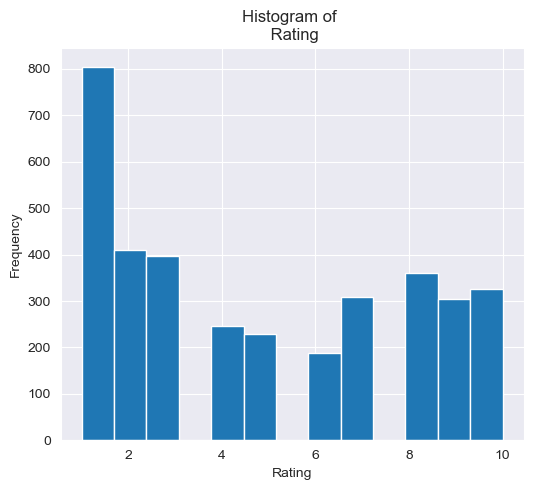

In [9]:
visualize_data(df, plot_type='numeric')

##### **Categorical columns (Bar plots)**

Due to the nature of the dataset need to remove column "Review_content" because has present of special characters and and unstrcure data which makes it not possible to plot. At the same time "Review_title" will be remove due to the same reason.

In [10]:
# Filter the column 'Review_content' and create a new DataFrame
df_viz_cat = df.drop(['Review_content', 'Review_title'], axis=1)

In [11]:
df_viz_cat

,Passanger_Name,Flying_month,Route,Rating,Verified,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,A321 neo,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,Embraer 190,Family Leisure
...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,NaN,Economy Class,no
3577,D Smith,NaN,NaN,4.0,NaN,Economy Class,no
3578,W Benson,NaN,NaN,6.0,NaN,Business Class,yes


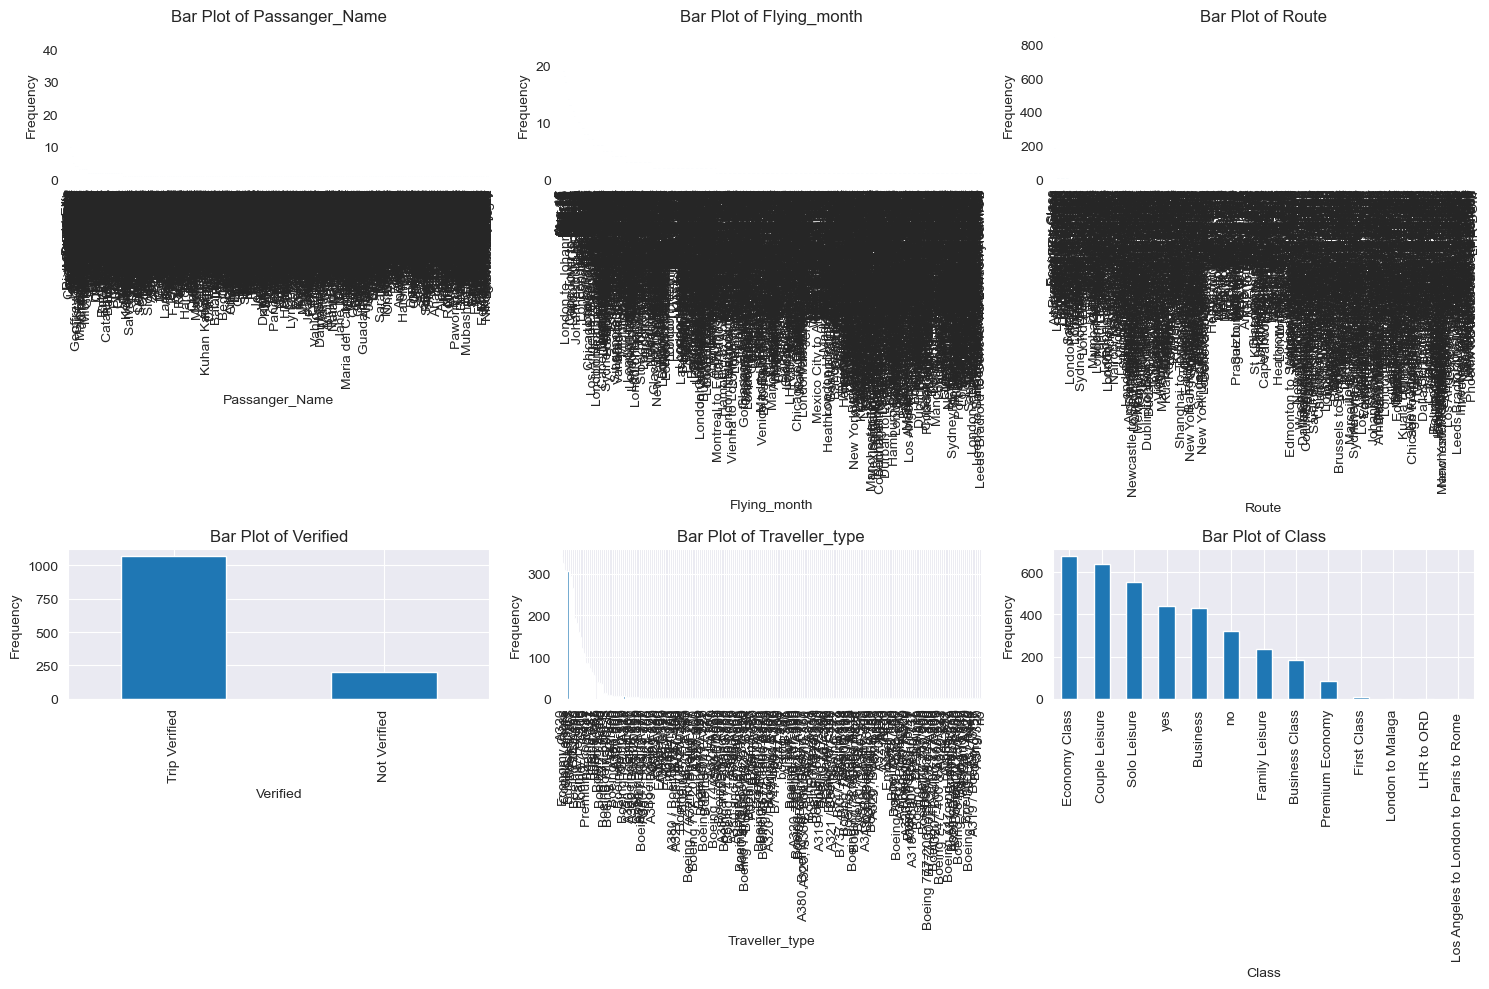

In [118]:
visualize_data(df_viz_cat, plot_type='categorical')

### **2.3. Missing values**

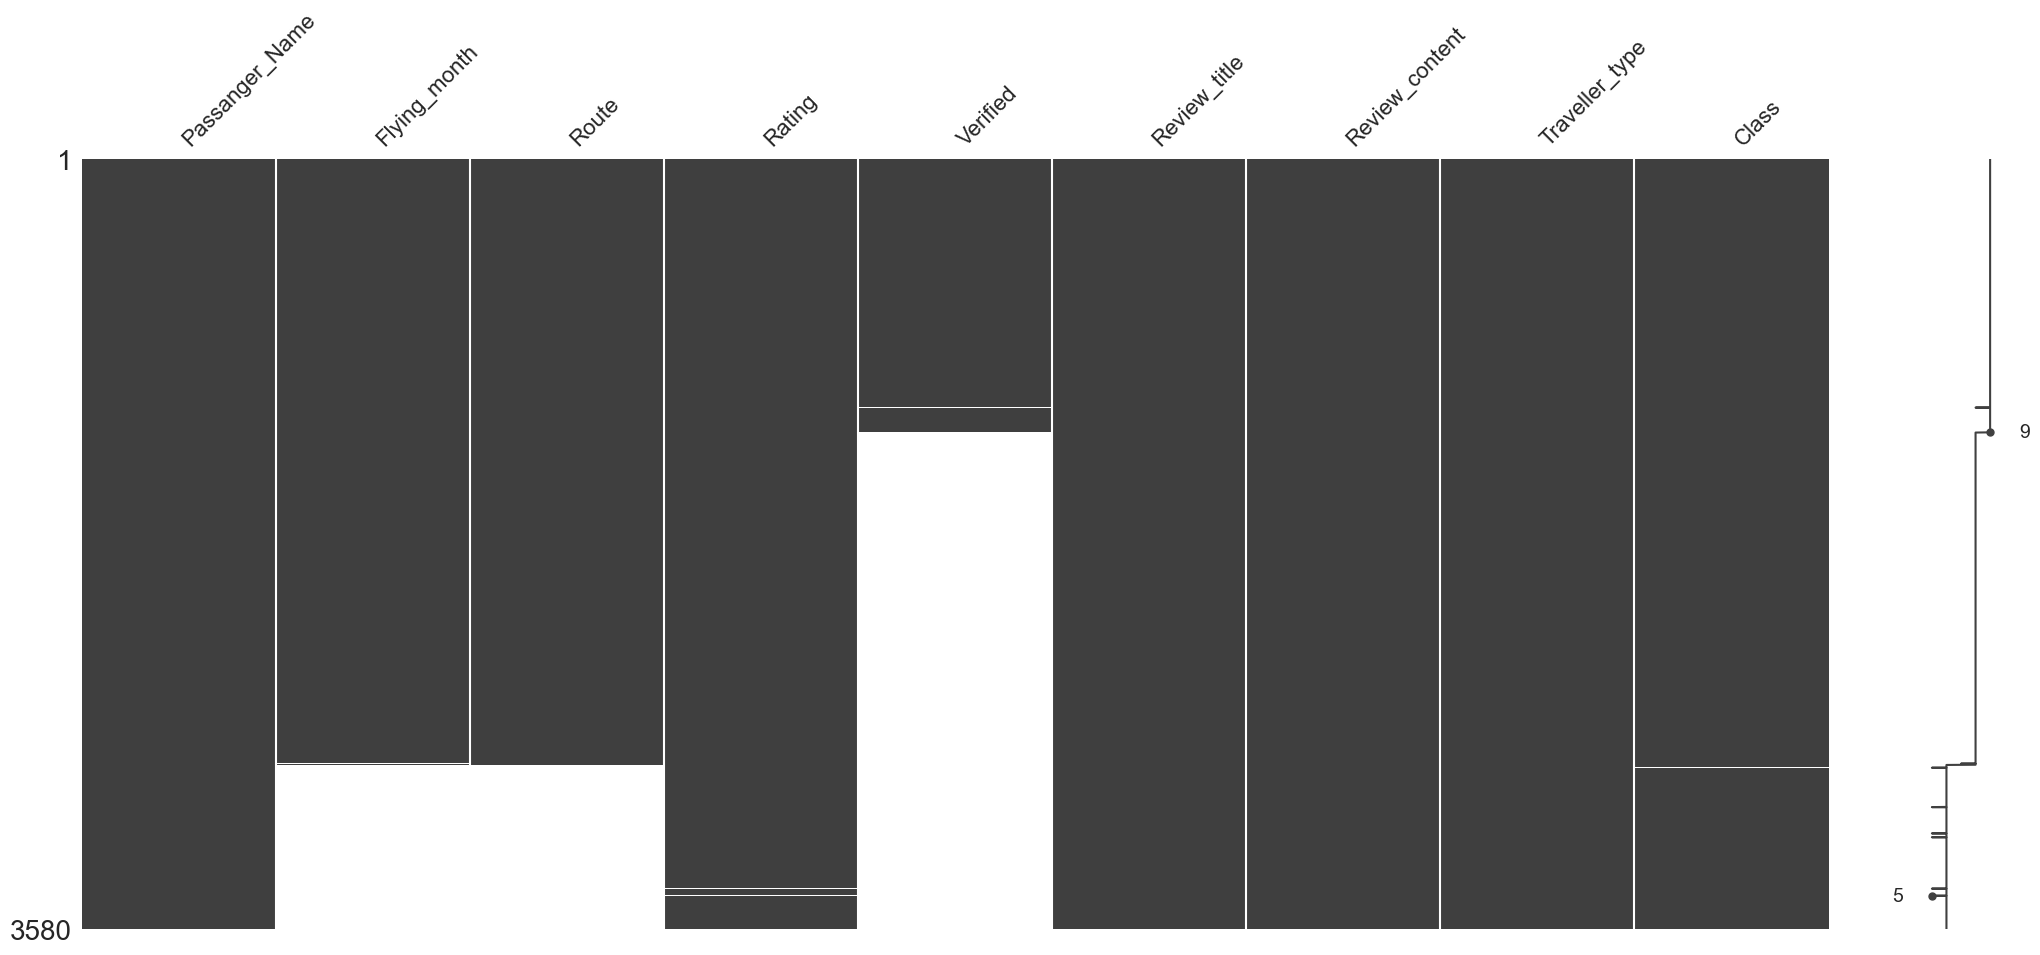

In [12]:
import missingno as msno

def visualize_missing_data(df):
    msno.matrix(df)  # Creates a matrix showing missing values
    # Or you can use msno.bar(df) to create a bar chart of missing values
    plt.show()

visualize_missing_data(df)

### **2.4. Duplicate values**

In [13]:
# Check Duplicates
df.duplicated().sum()
print("There are {} duplicated entries in the dataset".format(df.duplicated().sum()))

There are 74 duplicated entries in the dataset


### **2.5. Mix data identification**

##### **Correct Data on "Flying_month"**

In [14]:
correct_data_fm = df.query('~Flying_month.str.contains(" to ", na=False)')
correct_data_fm

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
5,M King,Jun-23,London to Washington,1.0,Trip Verified,Communication is terrible,Absolutely horrible airline. Communication is ...,Couple Leisure,Economy Class
8,Carol Willmore,Jun-23,London to Funchal,1.0,Not Verified,flight failed at every level,This flight failed at every level. We were del...,Couple Leisure,Economy Class
...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes


##### **Incorrect Data on "Flying_month"**

* **Route values are in the column "Flying_month" Long version**

In [15]:
incorrect_data_fm = df[df['Flying_month'].str.contains(' to ', na=False)]
incorrect_data_fm

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure
6,C Dean,Amsterdam to London,Business Class,1.0,Trip Verified,delays and cancellations,Having experienced delays and cancellations de...,A350,Business
7,Richard Hodges,London Heathrow to Kalamata,Economy Class,7.0,Trip Verified,Economy class seating was truly dreadful,Travelled to Heathrow to Kalamata and return j...,Boeing 737,Couple Leisure
16,A Garlen,Santiago to London,Economy Class,3.0,Trip Verified,Most uncomfortable flight,Most uncomfortable flight I have ever experien...,Boeing 787,Family Leisure
...,...,...,...,...,...,...,...,...,...
2800,J Harrison,LHR to YYZ,Economy Class,6.0,NaN,British Airways customer review,"Ended up on a 25-year-old 747, the second-olde...",B747-400,Solo Leisure
2801,Steve Gatenby,LGW to VCE,Economy Class,9.0,NaN,British Airways customer review,We were boarded quickly but suffered a weather...,A320,Couple Leisure
2802,Andrew Gascoyne,LHR to SOF,Business Class,1.0,NaN,British Airways customer review,Terrible. Flight time is well over 2 hours. Se...,A321,Business
2808,Mike Dickinson,Gatwick to Barbados,Business Class,5.0,NaN,British Airways customer review,Flew Club World from Gatwick to Barbados in Ap...,Boeing 777,Couple Leisure


In [16]:
incorrect_data_short_fm = df[df['Flying_month'].str.contains(' - ', na=False)]

In [17]:
incorrect_data_short_fm

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
2271,Craig Cutts,LHR - EDI to LHR,Economy Class,5.0,NaN,on board service okay,British Airways domestic economy only from Lon...,"A320, Boeing 767-300",Business


* **Yes values are in the column "Flying_month"**

In [18]:
incorrect_data_yes_fm = df[df['Flying_month'].str.contains('yes', na=False)]
incorrect_data_yes_fm

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
2814,Kevin Barrance,yes,LHR-BOM,7.0,NaN,British Airways customer review,This review concerns LHR-BOM in Business Class...,Business,Business Class
2815,R Tompkins,yes,Business Class,8.0,NaN,British Airways customer review,Family of 3 - 747 out (upper deck) 777 back. F...,Boeing 747 / 777,Family Leisure


* **No values are in the column "Flying_month"**

In [19]:
incorrect_data_no_fm = df[df['Flying_month'].str.contains('no', na=False)]
## Comparison should be equal to 'no'
incorrect_data_no= df[df['Flying_month'] == 'no']
incorrect_data_no_fm

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
42,Nicholas Felty,no,May-23,1.0,Trip Verified,I had to reschedule my flight,I booked business class tickets for my fiancé ...,Couple Leisure,Business Class
224,Mark Robinson,no,Jul-22,1.0,Trip Verified,become an absolute nightmare,Over 1 week ago I cancelled 2 Club Europe flig...,Business Class,London to Malaga
234,Paul Mayer,no,Jun-22,1.0,Not Verified,do not allow free seat selection,"Second time getting poor service from BA. 1st,...",Family Leisure,Business Class
419,barbara ciereszko,no,Jul-21,1.0,Not Verified,no refund issued yet,"Booked flight six months before travel, then m...",Family Leisure,Economy Class
615,C Jordan,Buenos Aires to London Heathrow,Premium Economy,2.0,Trip Verified,Seats were uncomfortable,Buenos Aires to London Heathrow rwturn. The ai...,Boeing 777-200,Couple Leisure
696,Peter Saunders,Buenos Aires to London Heathrow,Economy Class,9.0,Not Verified,made memorable by air hostess,Buenos Aires to London Heathrow. My wife and I...,Boeing 777,Couple Leisure
703,C Marni,Mykonos to London,Business Class,1.0,Trip Verified,worst business class experience,Mykonos to London flight delayed and waiting t...,A320,Business
780,Tony Hall,Rome Fiumicino to London City,Economy Class,10.0,Trip Verified,pleasant and professional,Rome Fiumicino to London City. A BA Cityflyer ...,Embraer,Solo Leisure
924,Joerg Boese,San Diego to Hannover via London,Economy Class,2.0,Trip Verified,miserable customer service,San Diego to Hannover via London. I booked on ...,Boeing 777,Solo Leisure
935,H Parker,Buenos Aires to London,Economy Class,1.0,Trip Verified,plane seating is worn out,Buenos Aires to London. We flew overnight Frid...,Boeing 777-200,Couple Leisure


Same Analysis should be done for all columns except for "Passanger". At the same time the column "Review_content" will be carefully analyse because it cotains unstructed data that we can use to fill missing values on the rest of the colums.

## 3. Data pre-processing

Data pre-processing techniques enhance data quality, crucial for accuracy and efficiency. This step is vital in knowledge discovery as quality decisions rely on quality data. Detecting and rectifying data anomalies early on, along with reducing the data for analysis, significantly benefits decision-making processes.

### **3.1. Standardizing Dataset Columns**

Before perfoming the cleaning is necessary to fix some noticeble errors within the structure of the dataset
Renaming Columns.

*   All columns must be lowercase.
*   Replace special characters.
*   Replace spaces using hyphens.

#### **3.1.1. Standarization Column names**

In [20]:
def std_column_names(df):
    '''
    This function will standardize the column names of a DataFrame.
    :param df: Data frame to standardize
    :return: Data frame with standardized column names
    '''
    df.columns = df.columns.str.replace(r'[\s()]+(?![A-Za-z-])', '-', regex=True)
    df.columns = df.columns.str.replace('[ _]', '-', regex=True)

    # Remove special characters, replace spaces and underscores with hyphens
    df.columns = df.columns.str.replace('[^a-zA-Z0-9_ -]', '', regex=True)

    # Convert column names to lowercase
    df.columns = df.columns.str.lower()

    # Remove consecutive hyphens
    df.columns = df.columns.str.replace('-+', '-', regex=True)

    # Remove the last hyphen from each column name
    df.columns = [col.rstrip('-') for col in df.columns]

    return df

In [21]:
df_standardized_cols = std_column_names(df)
df_standardized_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   passanger-name  3580 non-null   object 
 1   flying-month    2815 non-null   object 
 2   route           2816 non-null   object 
 3   rating          3575 non-null   float64
 4   verified        1270 non-null   object 
 5   review-title    3580 non-null   object 
 6   review-content  3580 non-null   object 
 7   traveller-type  3580 non-null   object 
 8   class           3579 non-null   object 
dtypes: float64(1), object(8)
memory usage: 251.8+ KB


In [22]:
def summary_null_data(df):
    '''
    This function will return a summary of the missing values in a DataFrame.
    :param df: Data frame to summarize
    :return: Data frame with summary of missing values
    '''
    nulldata = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)[:25])
    nulldata = nulldata.rename(columns = {0 : 'Null Values'})
    # Calculate and add the percentage of missing values with formatting
    nulldata['Percentage Missing'] = (nulldata['Null Values'] / len(df)) * 100
    nulldata['Percentage Missing'] = nulldata['Percentage Missing'].map('{:.2f}%'.format)
    return nulldata

In [23]:
summary_null_data(df_standardized_cols)

,Null Values,Percentage Missing
verified,2310,64.53%
flying-month,765,21.37%
route,764,21.34%
rating,5,0.14%
class,1,0.03%
passanger-name,0,0.00%
review-title,0,0.00%
review-content,0,0.00%
traveller-type,0,0.00%


Dealiing with missing values will be done later because it is a complex process

In [24]:
df_standardized_cols

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure
...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes


#### **3.1.2. Remove duplicate values**

In [25]:
# Remove duplicates values
df_standardized_cols = df_standardized_cols.drop_duplicates()
print("There are {} duplicated entries in the dataset".format(df_standardized_cols.duplicated().sum()))

There are 0 duplicated entries in the dataset


#### **3.1.3. Swap Data Values**

In [26]:
unique_values = df_standardized_cols.nunique()
unique_values

passanger-name    2764
flying-month      1174
route              744
rating              10
verified             2
review-title      2570
review-content    3506
traveller-type     203
class               13
dtype: int64


The cleaning process will begin on with the columns that have less unique values and the data type is a string unique values due to its simplicity to review, understand and correct. 

In [27]:
# Filter the dataframe to include only columns that are categorical
cat_columns = df_standardized_cols.select_dtypes(include=['object'])
# Calculate the number of unique values in these object columns
unique_values = cat_columns.nunique()
few_unique_val = unique_values[unique_values < 14]
few_unique_val

verified     2
class       13
dtype: int64

Columns listed above will be use to perform the first stage of the leaning process

In [28]:
# Get the names of the columns
col_few_unique_val = few_unique_val.index
col_few_unique_val

Index(['verified', 'class'], dtype='object')

It is necesary to do the identification of those values on all columns. 

In [29]:
# Assuming df_standardized_cols is your main dataframe and col_few_unique_val contains the column names with fewer than 14 unique values
columns_to_clean = []
# Filter out the "Passenger Name" column from the dataframe columns
columns_for_evaluation = df_standardized_cols.columns.drop("passanger-name")
# Iterate over columns with fewer than 14 unique values
for col_few_unique in col_few_unique_val:
    print('Evaluating column ->', col_few_unique)
    # Convert unique values to lower case strings for comparison
    #unique_values = df_standardized_cols[col_few_unique].astype(str).str.lower().unique()
    #print('Unique values ->', unique_values)
    unique_values = df_standardized_cols[col_few_unique].dropna().astype(str).str.lower().unique()
    print('Unique values (excluding NaN):', unique_values)
    columns_to_clean = []
    # Check these unique values against all columns
    for column in columns_for_evaluation:
        # Check if any of the unique values are present in the current column
        # Ensure the column is treated as a string and in lower case for comparison
        if any(df_standardized_cols[column].astype(str).str.lower().isin(unique_values)):
            # Add the column to the list if it contains any of the unique values
            columns_to_clean.append(column)
    # Print the final list of columns to clean
    print(f'Columns to clean for {col_few_unique} -->>', set(columns_to_clean))  # Using set to avoid duplicate entries


Evaluating column -> verified
Unique values (excluding NaN): ['trip verified' 'not verified']
Columns to clean for verified -->> {'verified'}
Evaluating column -> class
Unique values (excluding NaN): ['economy class' 'business class' 'solo leisure' 'family leisure'
 'business' 'couple leisure' 'premium economy' 'london to malaga'
 'first class' 'lhr to ord' 'los angeles to london to paris to rome ' 'no'
 'yes']
Columns to clean for class -->> {'traveller-type', 'flying-month', 'route', 'class'}


As seen above the column "verified" has no columns To correct this issue is because values "yes" and "no" should be replace them with the correct values. Those values will be replace by "Trip Verified" and "Not Verified"

In [30]:
df_standardized_cols = df_standardized_cols.replace(to_replace='yes', value='Trip Verified')

"yes" values that were on "Flying_month"

In [31]:
incorrect_data_yes_fm = df_standardized_cols[df_standardized_cols['flying-month'].str.contains('Trip Verified', na=False)]
incorrect_data_yes_fm

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class
2814,Kevin Barrance,Trip Verified,LHR-BOM,7.0,NaN,British Airways customer review,This review concerns LHR-BOM in Business Class...,Business,Business Class
2815,R Tompkins,Trip Verified,Business Class,8.0,NaN,British Airways customer review,Family of 3 - 747 out (upper deck) 777 back. F...,Boeing 747 / 777,Family Leisure


"no" values that were on "Flying_month"

In [32]:
df_standardized_cols = df_standardized_cols.replace(to_replace='no', value='Not Verified')

In [33]:
incorrect_data_no_fm = df_standardized_cols[df_standardized_cols['flying-month'].str.contains('Not Verified', na=False)]
incorrect_data_no_fm

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class
42,Nicholas Felty,Not Verified,May-23,1.0,Trip Verified,I had to reschedule my flight,I booked business class tickets for my fiancé ...,Couple Leisure,Business Class
224,Mark Robinson,Not Verified,Jul-22,1.0,Trip Verified,become an absolute nightmare,Over 1 week ago I cancelled 2 Club Europe flig...,Business Class,London to Malaga
234,Paul Mayer,Not Verified,Jun-22,1.0,Not Verified,do not allow free seat selection,"Second time getting poor service from BA. 1st,...",Family Leisure,Business Class
419,barbara ciereszko,Not Verified,Jul-21,1.0,Not Verified,no refund issued yet,"Booked flight six months before travel, then m...",Family Leisure,Economy Class
1748,Simon Warner,Not Verified,Jan-17,5.0,NaN,cost saving is clearly evident,Verified Review London Heathrow to Chicago i...,First Class,LHR to ORD
2552,Steve Purkis,Not Verified,Feb-15,1.0,NaN,Fawlty Towers of customer service,My issue is the very poor British Airways cust...,Family Leisure,Economy Class
2567,Travis Rodgers,Not Verified,Sep-15,5.0,NaN,seats were extremely small,The British Airways seats were extremely small...,Couple Leisure,Economy Class
2794,Tom Moore,Not Verified,May-15,1.0,NaN,British Airways customer review,Overall good experience. BA owns Vueling/Iberi...,Solo Leisure,Los Angeles to London to Paris to Rome
2813,Kevin Barrance,Not Verified,BOM-LHR,3.0,NaN,British Airways customer review,This review refers to a return trip from India...,Business,Premium Economy


"yes" values that were on "route"

In [34]:
incorrect_data_yes_ro = df_standardized_cols[df_standardized_cols['route'].str.contains('Trip Verified', na=False)]
incorrect_data_yes_ro

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class
2810,D Lee,NaN,Trip Verified,8.0,NaN,British Airways customer review,This is more of a general review having travel...,Family Leisure,Economy Class


"no" values that were on "route"

In [35]:
incorrect_data_no_ro = df_standardized_cols[df_standardized_cols['route'].str.contains('Not Verified', na=False)]
incorrect_data_no_ro

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class


'yes' values that were on "traveller-type"

In [36]:
incorrect_data_yes_tt = df_standardized_cols[df_standardized_cols['traveller-type'].str.contains('Trip Verified', na=False)]
incorrect_data_yes_tt

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class


'no' values that were on "traveller-type"

In [37]:
incorrect_data_no_tt = df_standardized_cols[df_standardized_cols['traveller-type'].str.contains('Not Verified', na=False)]
incorrect_data_no_tt

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class
2829,Grant Cooper,NaN,NaN,4.0,NaN,British Airways customer review,Club World: Just flown London Gatwick to Las V...,Not Verified,NaN


In [152]:
# export df_standardized_cols to csv
df_standardized_cols.to_csv('E:/Proyectos/notebooks/big_data/assessment/Airline_Review_Standardized.csv', index=False)

'yes' values that were on "class"

In [38]:
incorrect_data_yes_cl = df_standardized_cols[df_standardized_cols['class'].str.contains('Trip Verified', na=False)]
incorrect_data_yes_cl

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class
2820,R Vines,NaN,NaN,3.0,NaN,British Airways customer review,I flew from Heathrow to Tokyo Haneda in First....,First Class,Trip Verified
2825,Sean Kyte,NaN,NaN,7.0,NaN,British Airways customer review,Flew Eurotraveller Heathrow to Athens and back...,Economy Class,Trip Verified
2826,Peter Gordon,NaN,NaN,8.0,NaN,British Airways customer review,LHR-YYZ in World Traveller Plus (upgrade) in a...,Premium Economy,Trip Verified
2827,W Woon,NaN,NaN,7.0,NaN,British Airways customer review,BA873 KRK-LHR 17 May - a new sector launched j...,Economy Class,Trip Verified
2834,Alistair Baker,NaN,NaN,8.0,NaN,British Airways customer review,I treated myself to Premium Economy on my PEK-...,Premium Economy,Trip Verified
...,...,...,...,...,...,...,...,...,...
3569,Jack Hughes,NaN,NaN,8.0,NaN,British Airways customer review,Heathrow Marrakech. Had previously travelled o...,Economy Class,Trip Verified
3570,D Nolan,NaN,NaN,5.0,NaN,British Airways customer review,Flew return in CW from LHR to BKK in August 20...,Business Class,Trip Verified
3571,J Tinning,NaN,NaN,10.0,NaN,British Airways customer review,Flew LHR - VIE return operated by bmi but BA a...,Economy Class,Trip Verified
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,Trip Verified


In [39]:
incorrect_data_yes_cl = df_standardized_cols[df_standardized_cols['class'].str.contains('no', na=False)]
incorrect_data_yes_cl

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
5,M King,Jun-23,London to Washington,1.0,Trip Verified,Communication is terrible,Absolutely horrible airline. Communication is ...,Couple Leisure,Economy Class
8,Carol Willmore,Jun-23,London to Funchal,1.0,Not Verified,flight failed at every level,This flight failed at every level. We were del...,Couple Leisure,Economy Class
9,Nadine Kohler,Jun-23,Marseille to Seattle via London Heathrow,1.0,Not Verified,BA refuses to make it right,Beware of British Airways and their marketing ...,Family Leisure,Economy Class
...,...,...,...,...,...,...,...,...,...
2779,Thomas Kingston,Nov-14,London to Vienna,4.0,NaN,British Airways customer review,Slightly disappointing flight in an aircraft t...,Couple Leisure,Economy Class
2798,Nazira Khatun,Jun-15,London to Turkey,10.0,NaN,British Airways customer review,I flew out on the 8th June 2015 and all I can ...,Couple Leisure,Economy Class
2799,Nur Afiqah Rahmat,Jun-15,Abu Dhabi to Muscat,9.0,NaN,British Airways customer review,I fly with this airline almost every other wee...,Solo Leisure,Economy Class
2810,D Lee,NaN,Trip Verified,8.0,NaN,British Airways customer review,This is more of a general review having travel...,Family Leisure,Economy Class


'no' values that were on "class"

In [40]:
incorrect_data_no_cl = df_standardized_cols[df_standardized_cols['class'].str.contains('Not Verified', na=False)]
incorrect_data_no_cl

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class
2816,Charlotte Stiley,NaN,NaN,1.0,NaN,British Airways customer review,Travelled from Venice to Gatwick on 28th May c...,Business Class,Not Verified
2817,Tarun Thadani,NaN,NaN,2.0,NaN,British Airways customer review,Worst customer experience on BA flight. I have...,Economy Class,Not Verified
2818,Thomas Varughese,NaN,NaN,1.0,NaN,British Airways customer review,I had this terrible experience of traveling Br...,Economy Class,Not Verified
2819,A Anderson,NaN,NaN,4.0,NaN,British Airways customer review,BA362 6th June 2015. If this were the first fl...,Business Class,Not Verified
2821,David Ellis,NaN,NaN,2.0,NaN,British Airways customer review,HER-LGW. Our return flight confirmed our view ...,Business Class,Not Verified
...,...,...,...,...,...,...,...,...,...
3573,Bruce Bettridge,NaN,NaN,4.0,NaN,British Airways customer review,Business LHR to BKK. 747-400. First try back w...,Business Class,Not Verified
3574,J Robertson,NaN,NaN,1.0,NaN,British Airways customer review,This was a bmi Regional operated flight on a R...,Economy Class,Not Verified
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,Not Verified
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,Not Verified


* Fix verified column

A new column 'verified_aux' will be created to store the values that were replaced

In [41]:
fix_verified = df_standardized_cols.copy()

In [42]:
# Function to find 'Not Verified' or 'Trip Verified' in a row
def find_values(row, values_to_find):
    '''
    This function will find the values in a row that match the values_to_find list.
    :param row: row to search
    :param values_to_find: list of values to find
    :return: value found or None
    '''
    for col in df_standardized_cols.columns:
        if row[col] in values_to_find:
            # Store the value
            value_to_return = row[col]
            return value_to_return
    return None 

In [43]:
# Create a new column 'verified_aux' by applying the find_values function to each row
unique_values = fix_verified['verified'].dropna().unique()
unique_values

array(['Trip Verified', 'Not Verified'], dtype=object)

In [44]:
# Create the 'verified_aux' column using the modified function
fix_verified['verified_aux'] = fix_verified.apply(lambda row: find_values(row, unique_values), axis=1)

Replace values for verified and not verified in all dataset

In [45]:
# Replace the identified values in all columns except 'verified_aux' with None
for col in fix_verified.columns:
    if col not in ['verified_aux', 'verified']:  # Skip the 'verified_aux' column
        fix_verified[col] = fix_verified[col].apply(lambda x: None if x in unique_values else x)

# Display the DataFrame to verify the changes
fix_verified

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class,verified_aux
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Trip Verified
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Trip Verified
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Trip Verified
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Not Verified
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Trip Verified
...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,None,Not Verified
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,None,Not Verified
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,None,Not Verified
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,None,Trip Verified


In [34]:
fix_verified.to_csv('E:/Proyectos/notebooks/big_data/assessment/fix_verified.csv', index=False)

* Fix class column

Class values should be: Premium Economy, Economy Class, Business Class, First Class

In [46]:
fix_class = fix_verified.copy()

In [47]:
# Create a new column 'verified_aux' by applying the find_values function to each row
unique_values = ['Premium Economy', 'Economy Class', 'Business Class', 'First Class']
unique_values

['Premium Economy', 'Economy Class', 'Business Class', 'First Class']

In [48]:
# Create the 'verified_aux' column using the modified function
fix_class['class_aux'] = fix_class.apply(lambda row: find_values(row, unique_values), axis=1)

In [49]:
# Replace the identified values in all columns except 'verified_aux' with None
for col in fix_class.columns:
    if col not in ['class_aux', 'class']:  # Skip the 'verified_aux' column
        fix_class[col] = fix_class[col].apply(lambda x: None if x in unique_values else x)

# Display the DataFrame to verify the changes
fix_class

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class,verified_aux,class_aux
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Trip Verified,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Trip Verified,Business Class
2,E Lanewoski,Heathrow to Bodrum,None,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Trip Verified,Business Class
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Not Verified,Economy Class
4,R Vines,London City to Ibiza,None,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Trip Verified,Business Class
...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,None,None,Not Verified,Economy Class
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,None,None,Not Verified,Economy Class
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,None,None,Not Verified,Economy Class
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,None,None,Trip Verified,Business Class


In [39]:
# export fix_class to csv
fix_class.to_csv('E:/Proyectos/notebooks/big_data/assessment/fix_class.csv', index=False)

* Fix Traveller type column

Traveller type values should be: Couple Leisure, Family Leisure, Solo Leisure, Business.

In [50]:
fix_traveller_type = fix_class.copy()

In [51]:
# Create unique values for the column 'traveller-type'
unique_values = ['Couple Leisure', 'Family Leisure', 'Solo Leisure', 'Business']
unique_values

['Couple Leisure', 'Family Leisure', 'Solo Leisure', 'Business']

In [52]:
# Create the 'verified_aux' column using the modified function
fix_traveller_type['traveller_aux'] = fix_traveller_type.apply(lambda row: find_values(row, unique_values), axis=1)

In [53]:
# Replace the identified values in all columns except 'verified_aux' with None
for col in fix_traveller_type.columns:
    if col not in ['traveller_aux', 'traveller-type']:  # Skip the 'verified_aux' column
        fix_traveller_type[col] = fix_traveller_type[col].apply(lambda x: None if x in unique_values else x)

# Display the DataFrame to verify the changes
fix_traveller_type

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class,verified_aux,class_aux,traveller_aux
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Trip Verified,Economy Class,Solo Leisure
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Trip Verified,Business Class,Couple Leisure
2,E Lanewoski,Heathrow to Bodrum,None,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,None,Trip Verified,Business Class,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Not Verified,Economy Class,Solo Leisure
4,R Vines,London City to Ibiza,None,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,None,Trip Verified,Business Class,Family Leisure
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,None,None,Not Verified,Economy Class,None
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,None,None,Not Verified,Economy Class,None
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,None,None,Not Verified,Economy Class,None
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,None,None,Trip Verified,Business Class,None


In [54]:
# on traveller-type column replace values with None except for the values in unique_values
fix_traveller_type['traveller-type'] = fix_traveller_type['traveller-type'].apply(lambda x: None if x not in unique_values else x)

In [45]:
# export fix_traveller_type to csv
fix_traveller_type.to_csv('E:/Proyectos/notebooks/big_data/assessment/fix_traveller_type_v2.csv', index=False)

* Fix flying month column

In [55]:
fix_flying_month = fix_traveller_type.copy()

In [56]:
# Create pattern for months
#month_pattern = r"(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:-|\s).*"

month_pattern = r"(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\b"


# Initialize 'flying_month_aux' column
fix_flying_month['flying_month_aux'] = None
# Iterate over each column in the DataFrame
for col in cat_columns.columns:
    # Apply the regex pattern to each column and store the result in 'flying_month_aux'
    extracted_values = fix_flying_month[col].str.extract(month_pattern, expand=False)
    # Fill in 'flying_month_aux' with extracted values where it's currently empty
    fix_flying_month['flying_month_aux'] = fix_flying_month['flying_month_aux'].combine_first(extracted_values)

In [60]:
# export fix_flying_month to csv
fix_flying_month.to_csv('E:/Proyectos/notebooks/big_data/assessment/fix_flying_month.csv', index=False)

* Fix route column

In [57]:
fix_route = fix_flying_month.copy()

In [58]:
fix_route.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   passanger-name    3505 non-null   object 
 1   flying-month      2802 non-null   object 
 2   route             957 non-null    object 
 3   rating            3501 non-null   float64
 4   verified          1270 non-null   object 
 5   review-title      3506 non-null   object 
 6   review-content    3506 non-null   object 
 7   traveller-type    956 non-null    object 
 8   class             958 non-null    object 
 9   verified_aux      1970 non-null   object 
 10  class_aux         3504 non-null   object 
 11  traveller_aux     2813 non-null   object 
 12  flying_month_aux  1297 non-null   object 
dtypes: float64(1), object(12)
memory usage: 383.5+ KB


In [59]:
fix_route['route_aux'] = None

In [60]:
incorrect_data_fm = fix_route[fix_route['flying-month'].str.contains(' to ', na=False)]
incorrect_data_fm

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class,verified_aux,class_aux,traveller_aux,flying_month_aux,route_aux
2,E Lanewoski,Heathrow to Bodrum,None,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",None,None,Trip Verified,Business Class,Solo Leisure,None,None
4,R Vines,London City to Ibiza,None,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,None,None,Trip Verified,Business Class,Family Leisure,None,None
6,C Dean,Amsterdam to London,None,1.0,Trip Verified,delays and cancellations,Having experienced delays and cancellations de...,None,None,Trip Verified,Business Class,Business,None,None
7,Richard Hodges,London Heathrow to Kalamata,None,7.0,Trip Verified,Economy class seating was truly dreadful,Travelled to Heathrow to Kalamata and return j...,None,None,Trip Verified,Economy Class,Couple Leisure,None,None
16,A Garlen,Santiago to London,None,3.0,Trip Verified,Most uncomfortable flight,Most uncomfortable flight I have ever experien...,None,None,Trip Verified,Economy Class,Family Leisure,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,J Harrison,LHR to YYZ,None,6.0,NaN,British Airways customer review,"Ended up on a 25-year-old 747, the second-olde...",None,None,None,Economy Class,Solo Leisure,None,None
2801,Steve Gatenby,LGW to VCE,None,9.0,NaN,British Airways customer review,We were boarded quickly but suffered a weather...,None,None,None,Economy Class,Couple Leisure,None,None
2802,Andrew Gascoyne,LHR to SOF,None,1.0,NaN,British Airways customer review,Terrible. Flight time is well over 2 hours. Se...,None,None,None,Business Class,Business,None,None
2808,Mike Dickinson,Gatwick to Barbados,None,5.0,NaN,British Airways customer review,Flew Club World from Gatwick to Barbados in Ap...,None,None,None,Business Class,Couple Leisure,April,None


In [61]:
incorrect_data_short_fm = fix_route[fix_route['flying-month'].str.contains(' - ', na=False)]
incorrect_data_short_fm

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class,verified_aux,class_aux,traveller_aux,flying_month_aux,route_aux
2271,Craig Cutts,LHR - EDI to LHR,None,5.0,NaN,on board service okay,British Airways domestic economy only from Lon...,None,None,None,Economy Class,Business,None,None


In [62]:
# Update 'route_aux' with values from 'flying-month' where route patterns are found
# Using loc to avoid SettingWithCopyWarning
fix_route.loc[incorrect_data_fm.index, 'route_aux'] = incorrect_data_fm['flying-month']
fix_route.loc[incorrect_data_short_fm.index, 'route_aux'] = incorrect_data_short_fm['flying-month']

In [91]:
# export fix_route to csv
fix_route.to_csv('E:/Proyectos/notebooks/big_data/assessment/fix_route.csv', index=False)

In [63]:
correct_data_ro = fix_route[fix_route['route'].str.contains(' to ', na=False)]
correct_data_ro

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class,verified_aux,class_aux,traveller_aux,flying_month_aux,route_aux
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Trip Verified,Economy Class,Solo Leisure,Jun,None
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Trip Verified,Business Class,Couple Leisure,Mar,None
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Not Verified,Economy Class,Solo Leisure,Jun,None
5,M King,Jun-23,London to Washington,1.0,Trip Verified,Communication is terrible,Absolutely horrible airline. Communication is ...,Couple Leisure,Economy Class,Trip Verified,Economy Class,Couple Leisure,Jun,None
8,Carol Willmore,Jun-23,London to Funchal,1.0,Not Verified,flight failed at every level,This flight failed at every level. We were del...,Couple Leisure,Economy Class,Not Verified,Economy Class,Couple Leisure,Jun,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,Thomas Kingston,Nov-14,London to Vienna,4.0,NaN,British Airways customer review,Slightly disappointing flight in an aircraft t...,Couple Leisure,Economy Class,None,Economy Class,Couple Leisure,Nov,None
2788,C Barkei,Jun-15,LHR to LUX,8.0,NaN,British Airways customer review,Short hop from the empty terminal 1 at LHR to ...,Business,Business Class,None,Business Class,Business,Jun,None
2795,Michael Stanley,Jun-15,LHR to BKK,6.0,NaN,British Airways customer review,LHR to BKK June 13th 2015 Club World (Business...,Couple Leisure,Business Class,None,Business Class,Couple Leisure,Jun,None
2798,Nazira Khatun,Jun-15,London to Turkey,10.0,NaN,British Airways customer review,I flew out on the 8th June 2015 and all I can ...,Couple Leisure,Economy Class,None,Economy Class,Couple Leisure,Jun,None


In [64]:
correct_data_short_ro = fix_route[fix_route['route'].str.contains(' - ', na=False)]
correct_data_short_ro

,passanger-name,flying-month,route,rating,verified,review-title,review-content,traveller-type,class,verified_aux,class_aux,traveller_aux,flying_month_aux,route_aux


In [65]:
# Step 1: Identify rows where 'route' contains ' to '
correct_data_ro = fix_route[fix_route['route'].str.contains(' to ', na=False)]

# Step 2: From these rows, find where 'route_aux' is empty
empty_route_aux_in_correct_data = correct_data_ro['route_aux'].isna()

# Step 3: Update 'route_aux' in 'fix_route', but only for those specific rows
fix_route.loc[correct_data_ro[empty_route_aux_in_correct_data].index, 'route_aux'] = correct_data_ro['route']

In [66]:
# Assuming 'fix_route' is your DataFrame

# Identify rows in 'fix_route' where 'route_aux' is empty
empty_route_aux = fix_route['route_aux'].isna()

# Identify rows where 'route' contains ' to '
route_contains_to = fix_route['route'].str.contains(' to ', na=False)

# Only update 'route_aux' where it is currently missing and 'route' contains ' to '
fix_route.loc[empty_route_aux & route_contains_to, 'route_aux'] = fix_route['route']

In [96]:
# export fix_route to csv
fix_route.to_csv('E:/Proyectos/notebooks/big_data/assessment/fix_route_v2.csv', index=False)

In [67]:
fix_route.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   passanger-name    3505 non-null   object 
 1   flying-month      2802 non-null   object 
 2   route             957 non-null    object 
 3   rating            3501 non-null   float64
 4   verified          1270 non-null   object 
 5   review-title      3506 non-null   object 
 6   review-content    3506 non-null   object 
 7   traveller-type    956 non-null    object 
 8   class             958 non-null    object 
 9   verified_aux      1970 non-null   object 
 10  class_aux         3504 non-null   object 
 11  traveller_aux     2813 non-null   object 
 12  flying_month_aux  1297 non-null   object 
 13  route_aux         2790 non-null   object 
dtypes: float64(1), object(13)
memory usage: 539.9+ KB


In [68]:
data_swapped = fix_route.copy()
data_swapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   passanger-name    3505 non-null   object 
 1   flying-month      2802 non-null   object 
 2   route             957 non-null    object 
 3   rating            3501 non-null   float64
 4   verified          1270 non-null   object 
 5   review-title      3506 non-null   object 
 6   review-content    3506 non-null   object 
 7   traveller-type    956 non-null    object 
 8   class             958 non-null    object 
 9   verified_aux      1970 non-null   object 
 10  class_aux         3504 non-null   object 
 11  traveller_aux     2813 non-null   object 
 12  flying_month_aux  1297 non-null   object 
 13  route_aux         2790 non-null   object 
dtypes: float64(1), object(13)
memory usage: 539.9+ KB


In [69]:
data_swapped = data_swapped.drop(['flying-month', 'route','class','traveller-type', 'verified','verified_aux'], axis=1)

In [70]:
data_swapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   passanger-name    3505 non-null   object 
 1   rating            3501 non-null   float64
 2   review-title      3506 non-null   object 
 3   review-content    3506 non-null   object 
 4   class_aux         3504 non-null   object 
 5   traveller_aux     2813 non-null   object 
 6   flying_month_aux  1297 non-null   object 
 7   route_aux         2790 non-null   object 
dtypes: float64(1), object(7)
memory usage: 375.6+ KB


In [71]:
# Rename the columns aux to its original name
data_swapped = data_swapped.rename(columns={'class_aux': 'class', 'traveller_aux': 'traveller-type', 'flying_month_aux': 'flying-month', 'route_aux': 'route'})

In [72]:
data_swapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   passanger-name  3505 non-null   object 
 1   rating          3501 non-null   float64
 2   review-title    3506 non-null   object 
 3   review-content  3506 non-null   object 
 4   class           3504 non-null   object 
 5   traveller-type  2813 non-null   object 
 6   flying-month    1297 non-null   object 
 7   route           2790 non-null   object 
dtypes: float64(1), object(7)
memory usage: 375.6+ KB


In [73]:
df_corrected = data_swapped.copy()

In [74]:
# drop missing values on flying-month column
df_corrected = df_corrected.dropna(subset=['flying-month'])

In [75]:
df_corrected.isnull().sum()

passanger-name      0
rating              0
review-title        0
review-content      0
class               1
traveller-type    172
flying-month        0
route             181
dtype: int64

In [76]:
# drop missing values in traveller-type column
df_corrected = df_corrected.dropna(subset=['traveller-type'])

In [77]:
df_corrected.isnull().sum()

passanger-name    0
rating            0
review-title      0
review-content    0
class             1
traveller-type    0
flying-month      0
route             9
dtype: int64

In [78]:
# drop missing values in route column
df_corrected = df_corrected.dropna(subset=['route'])

In [79]:
df_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 2808
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   passanger-name  1116 non-null   object 
 1   rating          1116 non-null   float64
 2   review-title    1116 non-null   object 
 3   review-content  1116 non-null   object 
 4   class           1116 non-null   object 
 5   traveller-type  1116 non-null   object 
 6   flying-month    1116 non-null   object 
 7   route           1116 non-null   object 
dtypes: float64(1), object(7)
memory usage: 78.5+ KB


### **3.1.4. Data Transformation**

* Standardize route values

In [190]:
df_transform = df_corrected.copy()

In [191]:
df_transform[['origin', 'destination']] = df_transform['route'].str.split(' to ', n=1, expand=True)


In [192]:
df_transform[['destination', 'transit']] = df_transform['destination'].str.split(' via ', n=1, expand=True)

In [193]:
df_transform.head()

,passanger-name,rating,review-title,review-content,class,traveller-type,flying-month,route,origin,destination,transit
0,Paige Boet,1.0,The airline lost my luggage,The airline lost my luggage and was absolutely...,Economy Class,Solo Leisure,Jun,New Orleans to London,New Orleans,London,None
1,S Layne,1.0,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Business Class,Couple Leisure,Mar,London to Amman,London,Amman,None
3,Joel Burman,4.0,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Economy Class,Solo Leisure,Jun,Amman to London,Amman,London,None
5,M King,1.0,Communication is terrible,Absolutely horrible airline. Communication is ...,Economy Class,Couple Leisure,Jun,London to Washington,London,Washington,None
8,Carol Willmore,1.0,flight failed at every level,This flight failed at every level. We were del...,Economy Class,Couple Leisure,Jun,London to Funchal,London,Funchal,None


In [194]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 2808
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   passanger-name  1116 non-null   object 
 1   rating          1116 non-null   float64
 2   review-title    1116 non-null   object 
 3   review-content  1116 non-null   object 
 4   class           1116 non-null   object 
 5   traveller-type  1116 non-null   object 
 6   flying-month    1116 non-null   object 
 7   route           1116 non-null   object 
 8   origin          1116 non-null   object 
 9   destination     1116 non-null   object 
 10  transit         243 non-null    object 
dtypes: float64(1), object(10)
memory usage: 104.6+ KB


In [195]:
df_transform['origin'].unique()

array(['New Orleans', 'London', 'Amman', 'Marseille', 'Cairo',
       'Bucharest', 'Gatwick', 'Dublin', 'Tokyo', 'San Francisco',
       'Seattle', 'Sydney via Singapore', 'Athens', 'Vancouver', 'Boston',
       'Heathrow', 'Nice', 'Las Vegas', 'Dallas', 'Los Angeles',
       'Atlanta', 'New York', 'Sweden', 'Brussels', 'Copenhagen',
       'Hong Kong', 'Santorini', 'Madrid', 'Mumbai', 'Barcelona',
       'Marrakech', 'London Heathrow', 'Miami', 'Munich', 'Amsterdam',
       'Zagreb', 'New York JFK', 'Prague', 'Portland', 'Lyon',
       'Islamabad', 'Edinburgh', 'Faro', 'Johannesburg', 'London Gatwick',
       'Istanbul', 'Keflavik', 'Amman Jordan', 'Dusseldorf', 'Milan',
       'Dubai', 'Gothenburg', 'Sydney', 'Manchester', 'Berlin',
       'Dallas Ft Worth', 'Accra', 'Nairobi', 'Washington', 'Belfast',
       'Edmonton', 'Phoenix', 'Dallas Fort-Worth', 'Zurich', 'Dubrovnik',
       'Columbus', 'Basel', 'Glasgow', 'São Paulo', 'Pisa', 'Riyadh',
       'Barbados', 'Austin', 'Male', 'Ba

In [196]:
df_transform['destination'].unique()

array(['London', 'Amman', 'Washington', 'Funchal ', 'Seattle', 'London ',
       'Dallas', 'Venice', 'London City', 'Manchester', 'Nice',
       'London Heathrow ', 'Edinburgh', 'Durban', 'Barcelona', 'Cairo',
       'Santorini', 'Mumbai', 'Larnaca', 'London Heathrow', 'Madrid',
       'Valencia', 'San Francisco', 'Belfast', 'Faro', 'Los Angeles',
       'Denver', 'Gatwick', 'Copenhagen', 'Malta', 'Chicago', 'Marrakech',
       'Algiers', 'Munich', 'Belfast City', 'Amsterdam', 'Heathrow',
       'Orlando', 'Dubai', 'Glasgow', 'Tel Aviv', 'Milan Malpensa',
       'Las Vegas', 'Lyon', 'Buenos Aires', 'Vienna', 'Alicante',
       'Dublin', 'Athens Greece ', 'Vancouver', 'San francisco',
       'Frankfurt', 'Delhi', 'Male', 'Bangkok', 'Cancun', 'Phoenix',
       'Budapest', 'London UK (Heathrow)', 'Cape Town', 'Bologna',
       'Gibraltar', 'Nairobi', 'Jersey', 'Mexico City', 'Tampa',
       'Istanbul', 'Malaga', 'Tenerife', 'Manila', 'Thessaloniki',
       'New York', 'Toronto', 'Paris', 

In [197]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 2808
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   passanger-name  1116 non-null   object 
 1   rating          1116 non-null   float64
 2   review-title    1116 non-null   object 
 3   review-content  1116 non-null   object 
 4   class           1116 non-null   object 
 5   traveller-type  1116 non-null   object 
 6   flying-month    1116 non-null   object 
 7   route           1116 non-null   object 
 8   origin          1116 non-null   object 
 9   destination     1116 non-null   object 
 10  transit         243 non-null    object 
dtypes: float64(1), object(10)
memory usage: 104.6+ KB


In [198]:
# drop column transit
df_transform = df_transform.drop(['transit'], axis=1)

In [199]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 2808
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   passanger-name  1116 non-null   object 
 1   rating          1116 non-null   float64
 2   review-title    1116 non-null   object 
 3   review-content  1116 non-null   object 
 4   class           1116 non-null   object 
 5   traveller-type  1116 non-null   object 
 6   flying-month    1116 non-null   object 
 7   route           1116 non-null   object 
 8   origin          1116 non-null   object 
 9   destination     1116 non-null   object 
dtypes: float64(1), object(9)
memory usage: 95.9+ KB


In [200]:
map_locations = {
    r'\bLondon Heathrow\b': 'London',
    r'\bHeathrow\b': 'London',
    r'\bLondon Gatwick\b': 'London',
    r'\bGatwick\b': 'London',
    r'\bLondon City\b': 'London',
    r'\bLondon UK \(Heathrow\)\b': 'London',
    r'\bLHR\b': 'London',
    r'\bLondon Cuty\b': 'London',
    r'\bLondon UK (London)\b': 'London',
    r'\bTirana London\b': 'London',
    r'\bLGW\b': 'London'
}
df_transform[['origin', 'destination']] = df_transform[['origin', 'destination']].replace(map_locations, regex=True)


In [201]:
print(df_transform['origin'].unique())

['New Orleans' 'London' 'Amman' 'Marseille' 'Cairo' 'Bucharest' 'Dublin'
 'Tokyo' 'San Francisco' 'Seattle' 'Sydney via Singapore' 'Athens'
 'Vancouver' 'Boston' 'Nice' 'Las Vegas' 'Dallas' 'Los Angeles' 'Atlanta'
 'New York' 'Sweden' 'Brussels' 'Copenhagen' 'Hong Kong' 'Santorini'
 'Madrid' 'Mumbai' 'Barcelona' 'Marrakech' 'Miami' 'Munich' 'Amsterdam'
 'Zagreb' 'New York JFK' 'Prague' 'Portland' 'Lyon' 'Islamabad'
 'Edinburgh' 'Faro' 'Johannesburg' 'Istanbul' 'Keflavik' 'Amman Jordan'
 'Dusseldorf' 'Milan' 'Dubai' 'Gothenburg' 'Sydney' 'Manchester' 'Berlin'
 'Dallas Ft Worth' 'Accra' 'Nairobi' 'Washington' 'Belfast' 'Edmonton'
 'Phoenix' 'Dallas Fort-Worth' 'Zurich' 'Dubrovnik' 'Columbus' 'Basel'
 'Glasgow' 'São Paulo' 'Pisa' 'Riyadh' 'Barbados' 'Austin' 'Male'
 'Bangalore' 'Montréal' 'Cape Town' 'Durban' 'Warsaw' 'Kingston'
 'Washington DC' 'Singapore' 'Frankfurt' 'Gibraltar' 'Denver' 'Geneva'
 'Abuja' 'Mykonos' 'Washington Dulles' 'Moscow' 'Malaga' 'Bridgetown'
 'Ottawa' 'Antigua' '

In [202]:
print(df_transform['destination'].unique())

['London' 'Amman' 'Washington' 'Funchal ' 'Seattle' 'London ' 'Dallas'
 'Venice' 'Manchester' 'Nice' 'Edinburgh' 'Durban' 'Barcelona' 'Cairo'
 'Santorini' 'Mumbai' 'Larnaca' 'Madrid' 'Valencia' 'San Francisco'
 'Belfast' 'Faro' 'Los Angeles' 'Denver' 'Copenhagen' 'Malta' 'Chicago'
 'Marrakech' 'Algiers' 'Munich' 'Belfast City' 'Amsterdam' 'Orlando'
 'Dubai' 'Glasgow' 'Tel Aviv' 'Milan Malpensa' 'Las Vegas' 'Lyon'
 'Buenos Aires' 'Vienna' 'Alicante' 'Dublin' 'Athens Greece ' 'Vancouver'
 'San francisco' 'Frankfurt' 'Delhi' 'Male' 'Bangkok' 'Cancun' 'Phoenix'
 'Budapest' 'London UK (London)' 'Cape Town' 'Bologna' 'Gibraltar'
 'Nairobi' 'Jersey' 'Mexico City' 'Tampa' 'Istanbul' 'Malaga' 'Tenerife'
 'Manila' 'Thessaloniki' 'New York' 'Toronto' 'Paris' 'Montreal' 'Hamburg'
 'Toulouse' 'Thira' 'Zurich' 'Geneva' 'Mauritius' 'Johannesburg' 'Milan'
 'Aberdeen' 'Tokyo' 'Singapore' 'Barbados' 'Funchal' 'Antalya' 'Boston'
 'Porto' 'Newcastle' 'Detroit' 'Moscow' 'Portland' 'Paris CDG'
 'Tenerife So

In [203]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 2808
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   passanger-name  1116 non-null   object 
 1   rating          1116 non-null   float64
 2   review-title    1116 non-null   object 
 3   review-content  1116 non-null   object 
 4   class           1116 non-null   object 
 5   traveller-type  1116 non-null   object 
 6   flying-month    1116 non-null   object 
 7   route           1116 non-null   object 
 8   origin          1116 non-null   object 
 9   destination     1116 non-null   object 
dtypes: float64(1), object(9)
memory usage: 95.9+ KB


* Sentiment analysis

In [132]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [204]:
def get_sentiment_label(score):
    '''
    This function will return the sentiment label based on the score.
    :param score: Score to evaluate
    :return: Category of the score
    '''
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


df_transform['sentiment-score'] = df_transform['review-content'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_transform['sentiment-label'] = df_transform['sentiment-score'].apply(get_sentiment_label)

df_transform = df_transform.drop(columns=['sentiment-score'])
df_transform.head()

,passanger-name,rating,review-title,review-content,class,traveller-type,flying-month,route,origin,destination,sentiment-label
0,Paige Boet,1.0,The airline lost my luggage,The airline lost my luggage and was absolutely...,Economy Class,Solo Leisure,Jun,New Orleans to London,New Orleans,London,Negative
1,S Layne,1.0,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Business Class,Couple Leisure,Mar,London to Amman,London,Amman,Positive
3,Joel Burman,4.0,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Economy Class,Solo Leisure,Jun,Amman to London,Amman,London,Negative
5,M King,1.0,Communication is terrible,Absolutely horrible airline. Communication is ...,Economy Class,Couple Leisure,Jun,London to Washington,London,Washington,Negative
8,Carol Willmore,1.0,flight failed at every level,This flight failed at every level. We were del...,Economy Class,Couple Leisure,Jun,London to Funchal,London,Funchal,Positive


### **3.2. Data Integration**

To improve the dataset is necesary to integrate data from other sources. In this case a dataset for airports will be use.

In [205]:
df_airports = pd.read_csv('E:/Proyectos/notebooks/big_data/assessment/airports-code-public.csv')

In [206]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9187 entries, 0 to 9186
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airport Code  9187 non-null   object
 1   Airport Name  9187 non-null   object
 2   City Name     9179 non-null   object
 3   Country Name  8922 non-null   object
dtypes: object(4)
memory usage: 287.2+ KB


In [207]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 2808
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passanger-name   1116 non-null   object 
 1   rating           1116 non-null   float64
 2   review-title     1116 non-null   object 
 3   review-content   1116 non-null   object 
 4   class            1116 non-null   object 
 5   traveller-type   1116 non-null   object 
 6   flying-month     1116 non-null   object 
 7   route            1116 non-null   object 
 8   origin           1116 non-null   object 
 9   destination      1116 non-null   object 
 10  sentiment-label  1116 non-null   object 
dtypes: float64(1), object(10)
memory usage: 104.6+ KB


In [208]:
def extract_key(location):
    """
    Extract a key from the location name for grouping.
    Args: location (str): The location name.
    Returns: str: A key extracted from the location name.
    """
    # Handle special cases
    special_cases = {"Buenos Aires", "São Paulo"}
    for case in special_cases:
        if case in location:
            return case

    # Clean the location string
    cleaned_location = location.replace('-', ' ').replace(',', '').strip()
    words = cleaned_location.split()

    # Known prefixes that are usually followed by another word in city names
    common_prefixes = {'New', 'San', 'Los', 'St', 'Saint', "Las", "Abu", "Tel", "Hong", "Fort", "Cape", "Port", "Mount", "Sri", "Puerto", "Rio", "El", "La", "Lake", "Salt"}  
    key = ' '.join(words[:2]) if words[0] in common_prefixes and len(words) > 1 else words[0]
    return key.strip()

def group_locations(locations):
    """
    Group locations by a key extracted from their names.
    Args: locations (list): A list of location names.
    Returns: dict: A dictionary with keys extracted from location names and lists of full location names as values.
    """
    grouped_locations = defaultdict(list)
    for location in locations:
        key = extract_key(location)
        grouped_locations[key].append(location)
    
    return grouped_locations

In [209]:
def standardize_locations(locations, grouped):
    """
    Replace location names with a standardized value from their respective group.
    Args:
    locations (list): A list of original location names.
    grouped (dict): A dictionary of grouped location names.
    
    Returns:
    list: A list of standardized location names.
    """
    standard_locations = []
    for location in locations:
        first_word = extract_first_word(location)
        standard_locations.append(grouped[first_word][0])  # Replace with the first entry of the group
    return standard_locations

In [210]:
locations = df_transform['origin'].unique()
grouped = group_locations(locations)
grouped

defaultdict(list,
            {'New Orleans': ['New Orleans'],
             'London': ['London', 'London-London', ' London', 'London '],
             'Amman': ['Amman', 'Amman Jordan'],
             'Marseille': ['Marseille'],
             'Cairo': ['Cairo'],
             'Bucharest': ['Bucharest'],
             'Dublin': ['Dublin'],
             'Tokyo': ['Tokyo', 'Tokyo Narita'],
             'San Francisco': ['San Francisco'],
             'Seattle': ['Seattle'],
             'Sydney': ['Sydney via Singapore', 'Sydney'],
             'Athens': ['Athens'],
             'Vancouver': ['Vancouver'],
             'Boston': ['Boston'],
             'Nice': ['Nice'],
             'Las Vegas': ['Las Vegas'],
             'Dallas': ['Dallas', 'Dallas Ft Worth', 'Dallas Fort-Worth'],
             'Los Angeles': ['Los Angeles'],
             'Atlanta': ['Atlanta'],
             'New York': ['New York', 'New York JFK'],
             'Sweden': ['Sweden'],
             'Brussels': ['Brussels'],
 

In [211]:
# Creating a mapping from each variation to the standardized value
standardization_map = {variation: key for key, variations in grouped.items() for variation in variations}
df_transform['origin'] = df_transform['origin'].map(standardization_map)
print(df_transform['origin'].unique())

['New Orleans' 'London' 'Amman' 'Marseille' 'Cairo' 'Bucharest' 'Dublin'
 'Tokyo' 'San Francisco' 'Seattle' 'Sydney' 'Athens' 'Vancouver' 'Boston'
 'Nice' 'Las Vegas' 'Dallas' 'Los Angeles' 'Atlanta' 'New York' 'Sweden'
 'Brussels' 'Copenhagen' 'Hong Kong' 'Santorini' 'Madrid' 'Mumbai'
 'Barcelona' 'Marrakech' 'Miami' 'Munich' 'Amsterdam' 'Zagreb' 'Prague'
 'Portland' 'Lyon' 'Islamabad' 'Edinburgh' 'Faro' 'Johannesburg'
 'Istanbul' 'Keflavik' 'Dusseldorf' 'Milan' 'Dubai' 'Gothenburg'
 'Manchester' 'Berlin' 'Accra' 'Nairobi' 'Washington' 'Belfast' 'Edmonton'
 'Phoenix' 'Zurich' 'Dubrovnik' 'Columbus' 'Basel' 'Glasgow' 'São Paulo'
 'Pisa' 'Riyadh' 'Barbados' 'Austin' 'Male' 'Bangalore' 'Montréal'
 'Cape Town' 'Durban' 'Warsaw' 'Kingston' 'Singapore' 'Frankfurt'
 'Gibraltar' 'Denver' 'Geneva' 'Abuja' 'Mykonos' 'Moscow' 'Malaga'
 'Bridgetown' 'Ottawa' 'Antigua' 'Sofia' 'Rome' 'Chicago' 'San Diego'
 'Toronto' 'Vienna' 'Paris' 'Mexico' 'Orlando' 'Budapest' 'Toulouse'
 'Lisbon' 'Bordeaux' 'Se

In [212]:
locations = df_transform['destination'].unique()
grouped = group_locations(locations)
grouped

defaultdict(list,
            {'London': ['London', 'London ', 'London UK (London)'],
             'Amman': ['Amman'],
             'Washington': ['Washington'],
             'Funchal': ['Funchal ', 'Funchal'],
             'Seattle': ['Seattle'],
             'Dallas': ['Dallas'],
             'Venice': ['Venice'],
             'Manchester': ['Manchester', 'Manchester '],
             'Nice': ['Nice'],
             'Edinburgh': ['Edinburgh'],
             'Durban': ['Durban'],
             'Barcelona': ['Barcelona', 'Barcelona '],
             'Cairo': ['Cairo'],
             'Santorini': ['Santorini'],
             'Mumbai': ['Mumbai'],
             'Larnaca': ['Larnaca'],
             'Madrid': ['Madrid'],
             'Valencia': ['Valencia'],
             'San Francisco': ['San Francisco'],
             'Belfast': ['Belfast', 'Belfast City'],
             'Faro': ['Faro'],
             'Los Angeles': ['Los Angeles'],
             'Denver': ['Denver'],
             'Copenhagen': ['

In [213]:
# Creating a mapping from each variation to the standardized value
standardization_map = {variation: key for key, variations in grouped.items() for variation in variations}
df_transform['destination'] = df_transform['destination'].map(standardization_map)
print(df_transform['destination'].unique())

['London' 'Amman' 'Washington' 'Funchal' 'Seattle' 'Dallas' 'Venice'
 'Manchester' 'Nice' 'Edinburgh' 'Durban' 'Barcelona' 'Cairo' 'Santorini'
 'Mumbai' 'Larnaca' 'Madrid' 'Valencia' 'San Francisco' 'Belfast' 'Faro'
 'Los Angeles' 'Denver' 'Copenhagen' 'Malta' 'Chicago' 'Marrakech'
 'Algiers' 'Munich' 'Amsterdam' 'Orlando' 'Dubai' 'Glasgow' 'Tel Aviv'
 'Milan' 'Las Vegas' 'Lyon' 'Buenos Aires' 'Vienna' 'Alicante' 'Dublin'
 'Athens' 'Vancouver' 'San francisco' 'Frankfurt' 'Delhi' 'Male' 'Bangkok'
 'Cancun' 'Phoenix' 'Budapest' 'Cape Town' 'Bologna' 'Gibraltar' 'Nairobi'
 'Jersey' 'Mexico' 'Tampa' 'Istanbul' 'Malaga' 'Tenerife' 'Manila'
 'Thessaloniki' 'New York' 'Toronto' 'Paris' 'Montreal' 'Hamburg'
 'Toulouse' 'Thira' 'Zurich' 'Geneva' 'Mauritius' 'Johannesburg'
 'Aberdeen' 'Tokyo' 'Singapore' 'Barbados' 'Antalya' 'Boston' 'Porto'
 'Newcastle' 'Detroit' 'Moscow' 'Portland' 'Cayman' 'Sao' 'Catania'
 'Hong Kong' 'Bangalore' 'Accra' 'Ahmedabad' 'Maldives' 'Seville' 'Warsaw'
 'Stockholm' 

* Standardize airport code values

In [214]:
df_airports.head()

,Airport Code,Airport Name,City Name,Country Name
0,YCB,Cambridge Bay,Cambridge Bay,Canada
1,YKD,Township Airport,Kincardine,Canada
2,UPF,Pforheim,Pforheim,Germany
3,IXB,Bagdogra,Bagdogra,India
4,IMK,Simikot,Simikot,Nepal


In [215]:
def standarize_code_values(code):
    '''
    This function will standardize the airport code values.
    :param code: Code to standardize
    :return: Return City Name
    '''
    city_name = df_airports.loc[df_airports['Airport Code'] == code, 'City Name'].values
    return city_name[0] if city_name else code

In [216]:
# Apply the function to From_city and To_city columns
df_transform['origin'] = df_transform['origin'].str.strip().apply(standarize_code_values)
df_transform['destination'] = df_transform['destination'].str.strip().apply(standarize_code_values)

C:\Users\erick\AppData\Local\Temp\ipykernel_4480\3711773958.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  return city_name[0] if city_name else code


In [217]:
print(df_transform['origin'].unique())

['New Orleans' 'London' 'Amman' 'Marseille' 'Cairo' 'Bucharest' 'Dublin'
 'Tokyo' 'San Francisco' 'Seattle' 'Sydney' 'Athens' 'Vancouver' 'Boston'
 'Nice' 'Las Vegas' 'Dallas' 'Los Angeles' 'Atlanta' 'New York' 'Sweden'
 'Brussels' 'Copenhagen' 'Hong Kong' 'Santorini' 'Madrid' 'Mumbai'
 'Barcelona' 'Marrakech' 'Miami' 'Munich' 'Amsterdam' 'Zagreb' 'Prague'
 'Portland' 'Lyon' 'Islamabad' 'Edinburgh' 'Faro' 'Johannesburg'
 'Istanbul' 'Keflavik' 'Dusseldorf' 'Milan' 'Dubai' 'Gothenburg'
 'Manchester' 'Berlin' 'Accra' 'Nairobi' 'Washington' 'Belfast' 'Edmonton'
 'Phoenix' 'Zurich' 'Dubrovnik' 'Columbus' 'Basel' 'Glasgow' 'São Paulo'
 'Pisa' 'Riyadh' 'Barbados' 'Austin' 'Male' 'Bangalore' 'Montréal'
 'Cape Town' 'Durban' 'Warsaw' 'Kingston' 'Singapore' 'Frankfurt'
 'Gibraltar' 'Denver' 'Geneva' 'Abuja' 'Mykonos' 'Moscow' 'Malaga'
 'Bridgetown' 'Ottawa' 'Antigua' 'Sofia' 'Rome' 'Chicago' 'San Diego'
 'Toronto' 'Vienna' 'Paris' 'Mexico' 'Orlando' 'Budapest' 'Toulouse'
 'Lisbon' 'Bordeaux' 'Se

In [218]:
print(df_transform['destination'].unique())

['London' 'Amman' 'Washington' 'Funchal' 'Seattle' 'Dallas' 'Venice'
 'Manchester' 'Nice' 'Edinburgh' 'Durban' 'Barcelona' 'Cairo' 'Santorini'
 'Mumbai' 'Larnaca' 'Madrid' 'Valencia' 'San Francisco' 'Belfast' 'Faro'
 'Los Angeles' 'Denver' 'Copenhagen' 'Malta' 'Chicago' 'Marrakech'
 'Algiers' 'Munich' 'Amsterdam' 'Orlando' 'Dubai' 'Glasgow' 'Tel Aviv'
 'Milan' 'Las Vegas' 'Lyon' 'Buenos Aires' 'Vienna' 'Alicante' 'Dublin'
 'Athens' 'Vancouver' 'San francisco' 'Frankfurt' 'Delhi' 'Male' 'Bangkok'
 'Cancun' 'Phoenix' 'Budapest' 'Cape Town' 'Bologna' 'Gibraltar' 'Nairobi'
 'Jersey' 'Mexico' 'Tampa' 'Istanbul' 'Malaga' 'Tenerife' 'Manila'
 'Thessaloniki' 'New York' 'Toronto' 'Paris' 'Montreal' 'Hamburg'
 'Toulouse' 'Thira' 'Zurich' 'Geneva' 'Mauritius' 'Johannesburg'
 'Aberdeen' 'Tokyo' 'Singapore' 'Barbados' 'Antalya' 'Boston' 'Porto'
 'Newcastle' 'Detroit' 'Moscow' 'Portland' 'Cayman' 'Sao' 'Catania'
 'Hong Kong' 'Bangalore' 'Accra' 'Ahmedabad' 'Maldives' 'Seville' 'Warsaw'
 'Stockholm' 

In [219]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 2808
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passanger-name   1116 non-null   object 
 1   rating           1116 non-null   float64
 2   review-title     1116 non-null   object 
 3   review-content   1116 non-null   object 
 4   class            1116 non-null   object 
 5   traveller-type   1116 non-null   object 
 6   flying-month     1116 non-null   object 
 7   route            1116 non-null   object 
 8   origin           1115 non-null   object 
 9   destination      1116 non-null   object 
 10  sentiment-label  1116 non-null   object 
dtypes: float64(1), object(10)
memory usage: 104.6+ KB


In [220]:
# export df_transform to csv
df_transform.to_csv('E:/Proyectos/notebooks/big_data/assessment/df_transform.csv', index=False)

### **3.3. Data Visualization**

In [223]:
import plotly.express as px

# Creating the histogram with count labels
fig_histogram = px.histogram(df_transform, x='rating',
                             title='Ratings Distribution of Reviews',
                             labels={'rating': 'Rating'},
                             template='plotly_dark',
                             color='rating',
                             color_discrete_sequence=px.colors.sequential.Viridis)

# Enhancing the layout
fig_histogram.update_layout(
    xaxis_title="Rating",
    yaxis_title="Number of Reviews",
    title_x=0.5,
    title_font_size=20,
    xaxis=dict(tickmode='linear'),
    bargap=0.2,
)

# Adding count labels to each bar
fig_histogram.update_traces(texttemplate='%{y}', textposition='outside')
fig_histogram.show()

In [224]:
import calendar

# Convert month names to numbers and sort
month_to_num = {month: index for index, month in enumerate(calendar.month_abbr) if month}
df_transform['month_num'] = df_transform['flying-month'].map(month_to_num)

# Group by month and count the number of reviews
monthly_trend = df_transform.groupby('month_num').size().reset_index(name='count')

# Create an improved line graph for the monthly trend
fig_line = px.line(monthly_trend, x='month_num', y='count',
                   title='Monthly Travel Trends',
                   labels={'month_num': 'Month', 'count': 'Number of Reviews'},
                   template='plotly_dark')

# Enhancing the layout
fig_line.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(month_to_num.values()), ticktext=list(month_to_num.keys())),
    xaxis_title="Month",
    yaxis_title="Number of Reviews",
    title_x=0.5,
    title_font_size=20,
)

fig_line.show()


In [227]:
import plotly.express as px

# Sentiment Analysis vs. Class
fig_sentiment_class = px.histogram(df_transform, x='class', color='sentiment-label',
                                   title='Customer satisfaction by Class',
                                   labels={'class': 'Class', 'sentiment-label': 'Sentiment'},
                                   template='plotly_dark',
                                   color_discrete_sequence=px.colors.sequential.Viridis)

# Enhancing the layout
fig_sentiment_class.update_layout(
    xaxis_title="Class",
    yaxis_title="Number of Reviews",
    title_x=0.5,
    title_font_size=20,
    bargap=0.2,
)

fig_sentiment_class.show()


In [228]:
# Sentiment Analysis vs. Traveller Type
fig_sentiment_traveller = px.histogram(df_transform, x='traveller-type', color='sentiment-label',
                                       title='Customer satisfaction by Traveller Type',
                                       labels={'traveller-type': 'Traveller Type', 'sentiment-label': 'Sentiment'},
                                       template='plotly_dark',
                                       color_discrete_sequence=px.colors.sequential.Viridis)

# Enhancing the layout
fig_sentiment_traveller.update_layout(
    xaxis_title="Traveller Type",
    yaxis_title="Number of Reviews",
    title_x=0.5,
    title_font_size=20,
    bargap=0.2,
)

fig_sentiment_traveller.show()


In [229]:
import calendar
import plotly.express as px

# Convert month names to numbers for sorting
month_to_num = {month: index for index, month in enumerate(calendar.month_abbr) if month}
df_transform['month_num'] = df_transform['flying-month'].map(month_to_num)

# Create a bar chart for Month vs Sentiment Analysis
fig_month_sentiment = px.histogram(df_transform, x='month_num', color='sentiment-label',
                                   title='Sentiment Analysis by Month',
                                   labels={'month_num': 'Month', 'sentiment-label': 'Sentiment'},
                                   category_orders={'month_num': list(calendar.month_abbr)},
                                   template='plotly_dark',
                                   color_discrete_sequence=px.colors.sequential.Viridis)

# Enhancing the layout
fig_month_sentiment.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(month_to_num.values()), ticktext=list(month_to_num.keys())),
    xaxis_title="Month",
    yaxis_title="Number of Reviews",
    title_x=0.5,
    title_font_size=20,
    bargap=0.2,
)

fig_month_sentiment.show()


In [231]:
import plotly.express as px
import calendar

# Convert month names to numbers for sorting
month_to_num = {month: index for index, month in enumerate(calendar.month_abbr) if month}
df_transform['month_num'] = df_transform['flying-month'].map(month_to_num)

# Group by month and sentiment, then count the occurrences
df_grouped = df_transform.groupby(['month_num', 'sentiment-label']).size().reset_index(name='count')

# Create an area chart for Month vs Sentiment Analysis
fig_month_sentiment = px.area(df_grouped, x='month_num', y='count', color='sentiment-label',
                              title='Monthly Sentiment Analysis Trends',
                              labels={'month_num': 'Month', 'sentiment-label': 'Sentiment', 'count': 'Number of Reviews'},
                              category_orders={'month_num': list(calendar.month_abbr)},
                              template='plotly_dark',
                              color_discrete_sequence=px.colors.sequential.Plasma)

# Enhancing the layout
fig_month_sentiment.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(month_to_num.values()), ticktext=list(month_to_num.keys())),
    xaxis_title="Month",
    yaxis_title="Number of Reviews",
    title_x=0.5,
    title_font_size=20
)

fig_month_sentiment.show()


In [232]:
import plotly.express as px

# Create a new 'route' column
df_transform['route'] = df_transform['origin'] + " to " + df_transform['destination']

# Determine the count for each route
route_counts = df_transform['route'].value_counts().reset_index()
route_counts.columns = ['route', 'count']

# Creating a bar chart for the most popular routes
fig_routes = px.bar(route_counts.head(10), x='count', y='route', orientation='h',
                    title='Top 10 Most Popular Travel Routes',
                    labels={'count': 'Number of Travels', 'route': 'Route'},
                    template='plotly_dark',
                    color='count',
                    color_continuous_scale=px.colors.sequential.Viridis)

# Enhancing the layout
fig_routes.update_layout(
    yaxis_title="Route",
    xaxis_title="Number of Travels",
    title_x=0.5,
    title_font_size=20
)

fig_routes.show()


In [241]:
import plotly.express as px

# Counting the frequency of each route
route_counts = df_transform['route'].value_counts()

# Identifying the top 10 and bottom 10 routes
top_10_routes = route_counts.head(10).index
bottom_10_routes = route_counts.tail(10).index

# Filter the original dataset for the top 10 routes
top_routes_df = df_transform[df_transform['route'].isin(top_10_routes)]
top_route_sentiment = top_routes_df.groupby(['route', 'sentiment-label']).size().reset_index(name='count')
top_route_sentiment_pivot = top_route_sentiment.pivot(index='route', columns='sentiment-label', values='count').fillna(0)

# Creating a stacked bar chart for the top 10 routes
fig_top_route_sentiment = px.bar(top_route_sentiment_pivot, 
                                 title="Sentiment Distribution for Top 10 Routes",
                                 labels={'value': 'Number of Reviews', 'route': 'Route'},
                                 template='plotly_dark',
                                 barmode='stack')

# Enhancing the layout
fig_top_route_sentiment.update_layout(
    xaxis_title="Route",
    yaxis_title="Number of Reviews",
    title_x=0.5,
    title_font_size=20
)

fig_top_route_sentiment.show()


In [243]:
import plotly.express as px

# Counting the frequency of each route
route_counts = df_transform['route'].value_counts()

# Identifying the top 10 and bottom 10 routes
bottom_10_routes = route_counts.tail(10).index

# Filter the original dataset for the bottom 10 routes
bottom_routes_df = df_transform[df_transform['route'].isin(bottom_10_routes)]
bottom_route_sentiment = bottom_routes_df.groupby(['route', 'sentiment-label']).size().reset_index(name='count')
bottom_route_sentiment_pivot = bottom_route_sentiment.pivot(index='route', columns='sentiment-label', values='count').fillna(0)

# Creating a stacked bar chart for the bottom 10 routes
fig_bottom_route_sentiment = px.bar(bottom_route_sentiment_pivot, 
                                    title="Sentiment Distribution for Bottom 10 Routes",
                                    labels={'value': 'Number of Reviews', 'route': 'Route'},
                                    template='plotly_dark',
                                    barmode='stack')

# Enhancing the layout
fig_bottom_route_sentiment.update_layout(
    xaxis_title="Route",
    yaxis_title="Number of Reviews",
    title_x=0.5,
    title_font_size=20
)

fig_bottom_route_sentiment.show()


In [254]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Identify the top 10 routes
top_10_routes = df_transform['route'].value_counts().head(10).index

# Filter data for top 10 routes
top_routes_data = df_transform[df_transform['route'].isin(top_10_routes)]

# Prepare data for the bar component (traveller types)
traveller_type_data = top_routes_data.groupby(['route', 'traveller-type']).size().reset_index(name='count')

# Prepare data for the line component (sentiment analysis counts)
sentiment_data = top_routes_data.groupby(['route', 'sentiment-label']).size().reset_index(name='sentiment_count')

# Create a combo chart
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar plot for traveller types
for traveller_type in df_transform['traveller-type'].unique():
    filtered_data = traveller_type_data[traveller_type_data['traveller-type'] == traveller_type]
    fig.add_trace(
        go.Bar(x=filtered_data['route'], y=filtered_data['count'], name=traveller_type),
        secondary_y=False,
    )

# Add line plot for sentiment analysis counts
for sentiment in df_transform['sentiment-label'].unique():
    filtered_data = sentiment_data[sentiment_data['sentiment-label'] == sentiment]
    fig.add_trace(
        go.Scatter(x=filtered_data['route'], y=filtered_data['sentiment_count'], name=sentiment, mode='lines+markers'),
        secondary_y=True,
    )

# Update layout
fig.update_layout(
    title_text="Top 10 Routes: Traveller Type Satisfaction",
    xaxis_title="Route",
    yaxis_title="Number of Travellers",
    template="plotly_dark"
)
fig.update_yaxes(title_text="Sentiment Analysis Count", secondary_y=True)

fig.show()


In [258]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Identify the bottom 10 routes
bottom_10_routes = df_transform['route'].value_counts().tail(10).index

# Filter data for bottom 10 routes
bottom_routes_data = df_transform[df_transform['route'].isin(bottom_10_routes)]

# Prepare data for the bar component (traveller types)
traveller_type_data = bottom_routes_data.groupby(['route', 'traveller-type']).size().reset_index(name='count')

# Prepare data for the line component (sentiment analysis counts)
sentiment_data = bottom_routes_data.groupby(['route', 'sentiment-label']).size().reset_index(name='sentiment_count')

# Create a combo chart
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar plot for traveller types
for traveller_type in df_transform['traveller-type'].unique():
    filtered_data = traveller_type_data[traveller_type_data['traveller-type'] == traveller_type]
    fig.add_trace(
        go.Bar(x=filtered_data['route'], y=filtered_data['count'], name=traveller_type),
        secondary_y=False,
    )

# Add line plot for sentiment analysis counts
for sentiment in df_transform['sentiment-label'].unique():
    filtered_data = sentiment_data[sentiment_data['sentiment-label'] == sentiment]
    fig.add_trace(
        go.Scatter(x=filtered_data['route'], y=filtered_data['sentiment_count'], name=sentiment, mode='lines+markers'),
        secondary_y=True,
    )

# Update layout
fig.update_layout(
    title_text="Bottom 10 Routes: Traveller Type Satisfaction",
    xaxis_title="Route",
    yaxis_title="Number of Travellers",
    template="plotly_dark"
)
fig.update_yaxes(title_text="Sentiment Analysis Count", secondary_y=True)

fig.show()


In [259]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Identify the top 10 routes
top_10_routes = df_transform['route'].value_counts().head(10).index

# Filter data for top 10 routes
top_routes_data = df_transform[df_transform['route'].isin(top_10_routes)]

# Prepare data for the bar component (classes)
class_data = top_routes_data.groupby(['route', 'class']).size().reset_index(name='count')

# Prepare data for the line component (sentiment analysis counts)
sentiment_data = top_routes_data.groupby(['route', 'sentiment-label']).size().reset_index(name='sentiment_count')

# Create a combo chart
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar plot for classes
for travel_class in df_transform['class'].unique():
    filtered_data = class_data[class_data['class'] == travel_class]
    fig.add_trace(
        go.Bar(x=filtered_data['route'], y=filtered_data['count'], name=travel_class),
        secondary_y=False,
    )

# Add line plot for sentiment analysis counts
for sentiment in df_transform['sentiment-label'].unique():
    filtered_data = sentiment_data[sentiment_data['sentiment-label'] == sentiment]
    fig.add_trace(
        go.Scatter(x=filtered_data['route'], y=filtered_data['sentiment_count'], name=sentiment, mode='lines+markers'),
        secondary_y=True,
    )

# Update layout
fig.update_layout(
    title_text="Top 10 Routes: Class review Satisfaction",
    xaxis_title="Route",
    yaxis_title="Number of Reviews per Class",
    template="plotly_dark"
)
fig.update_yaxes(title_text="Sentiment Analysis Count", secondary_y=True)

fig.show()


In [262]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Identify the bottom 10 routes
bottom_10_routes = df_transform['route'].value_counts().tail(10).index

# Filter data for bottom 10 routes
bottom_routes_data = df_transform[df_transform['route'].isin(bottom_10_routes)]

# Prepare data for the bar component (classes)
class_data = bottom_routes_data.groupby(['route', 'class']).size().reset_index(name='count')

# Prepare data for the line component (sentiment analysis counts)
sentiment_data = bottom_routes_data.groupby(['route', 'sentiment-label']).size().reset_index(name='sentiment_count')

# Create a combo chart
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar plot for classes
for travel_class in df_transform['class'].unique():
    filtered_data = class_data[class_data['class'] == travel_class]
    fig.add_trace(
        go.Bar(x=filtered_data['route'], y=filtered_data['count'], name=travel_class),
        secondary_y=False,
    )

# Add line plot for sentiment analysis counts
for sentiment in df_transform['sentiment-label'].unique():
    filtered_data = sentiment_data[sentiment_data['sentiment-label'] == sentiment]
    fig.add_trace(
        go.Scatter(x=filtered_data['route'], y=filtered_data['sentiment_count'], name=sentiment, mode='lines+markers'),
        secondary_y=True,
    )

# Update layout
fig.update_layout(
    title_text="Bottom 10 Routes: Class review Satisfaction",
    xaxis_title="Route",
    yaxis_title="Number of Reviews per Class",
    template="plotly_dark"
)
fig.update_yaxes(title_text="Sentiment Analysis Count", secondary_y=True)

fig.show()


In [264]:
import plotly.express as px
import calendar

# Convert month names to numbers for sorting
month_to_num = {month: index for index, month in enumerate(calendar.month_abbr) if month}
df_transform['month_num'] = df_transform['flying-month'].map(month_to_num)

# Identify the top 10 routes
top_10_routes = df_transform['route'].value_counts().head(10).index

# Filter data for top 10 routes
top_routes_data = df_transform[df_transform['route'].isin(top_10_routes)]

# Group data by route and month, then count the occurrences
route_month_counts = top_routes_data.groupby(['route', 'month_num']).size().reset_index(name='count')

# Pivot data for heatmap
route_month_pivot = route_month_counts.pivot('route', 'month_num', 'count').fillna(0)

# Convert month_num back to month names for better readability
route_month_pivot.columns = [calendar.month_abbr[col] if col != 0 else '' for col in route_month_pivot.columns]

# Create the heatmap
fig = px.imshow(route_month_pivot, 
                labels=dict(x="Month", y="Route", color="Review Count"),
                x=route_month_pivot.columns,
                y=route_month_pivot.index,
                title="Heatmap of Top 10 Routes Over Months",
                template='plotly_dark')

# Enhancing the layout
fig.update_xaxes(side="bottom")
fig.show()


C:\Users\erick\AppData\Local\Temp\ipykernel_4480\4101875189.py:18: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



In [265]:
import plotly.express as px
import calendar

# Prepare data for the heatmap
month_to_num = {month: index for index, month in enumerate(calendar.month_abbr) if month}
df_transform['month_num'] = df_transform['flying-month'].map(month_to_num)
top_10_routes = df_transform['route'].value_counts().head(10).index
top_routes_data = df_transform[df_transform['route'].isin(top_10_routes)]
route_month_counts = top_routes_data.groupby(['route', 'month_num']).size().reset_index(name='count')
route_month_pivot = route_month_counts.pivot('route', 'month_num', 'count').fillna(0)
route_month_pivot.columns = [calendar.month_abbr[col] if col != 0 else '' for col in route_month_pivot.columns]

# Create the enhanced heatmap
fig = px.imshow(route_month_pivot, 
                labels=dict(x="Month", y="Route", color="Review Count"),
                x=route_month_pivot.columns,
                y=route_month_pivot.index,
                title="Heatmap of Top 10 Routes Over Months",
                template='plotly_dark',
                color_continuous_scale='Viridis')  # Using the 'Viridis' color scale

# Add annotations for precise values (optional)
for y_index, y in enumerate(route_month_pivot.index):
    for x_index, x in enumerate(route_month_pivot.columns):
        fig.add_annotation(x=x, y=y, text=str(route_month_pivot.iloc[y_index, x_index]),
                           showarrow=False, font_size=8)

# Enhancing the layout
fig.update_xaxes(side="bottom")
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Route",
    title_x=0.5,
    title_font_size=20,
    autosize=False,
    width=800,
    height=600
)

fig.show()


C:\Users\erick\AppData\Local\Temp\ipykernel_4480\3539290426.py:10: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



In [267]:
import plotly.express as px
import calendar

# Prepare data for the heatmap
month_to_num = {month: index for index, month in enumerate(calendar.month_abbr) if month}
df_transform['month_num'] = df_transform['flying-month'].map(month_to_num)
bottom_10_routes = df_transform['route'].value_counts().tail(5).index
bottom_routes_data = df_transform[df_transform['route'].isin(bottom_10_routes)]
route_month_counts = bottom_routes_data.groupby(['route', 'month_num']).size().reset_index(name='count')
route_month_pivot = route_month_counts.pivot('route', 'month_num', 'count').fillna(0)
route_month_pivot.columns = [calendar.month_abbr[col] if col != 0 else '' for col in route_month_pivot.columns]

# Create the enhanced heatmap
fig = px.imshow(route_month_pivot, 
                labels=dict(x="Month", y="Route", color="Review Count"),
                x=route_month_pivot.columns,
                y=route_month_pivot.index,
                title="Heatmap of Bottom 5 Routes Over Months",
                template='plotly_dark',
                color_continuous_scale='Viridis')

# Add annotations for precise values (optional)
for y_index, y in enumerate(route_month_pivot.index):
    for x_index, x in enumerate(route_month_pivot.columns):
        fig.add_annotation(x=x, y=y, text=str(route_month_pivot.iloc[y_index, x_index]),
                           showarrow=False, font_size=8)

# Enhancing the layout
fig.update_xaxes(side="bottom")
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Route",
    title_x=0.5,
    title_font_size=20,
    autosize=False,
    width=800,
    height=600
)

fig.show()


C:\Users\erick\AppData\Local\Temp\ipykernel_4480\1935816869.py:10: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



### **3.4. Normal distribution**
To rigorously assess dataset normality, the following steps are employed:

-   **Data Plots:** Initial visual inspection through data plots, including histograms and Q-Q plots, serves as a preliminary assessment. Departures from a bell-shaped curve or a straight line in Q-Q plots may indicate non-normality.

-   **Skewness Test:** A skewness test quantifies data asymmetry. Positive or negative values indicate skewness. Values close to zero suggest normality.

-   **Shapiro-Wilk Test:** This formal statistical test provides a definitive verdict on normality. A p-value less than the significance level indicates non-normality.

These steps allow a conclusive determination of whether the dataset adheres to a normal distribution or deviates from it.

**Analysis for Fuel Economy:**

***Rating***

* Data Plots.

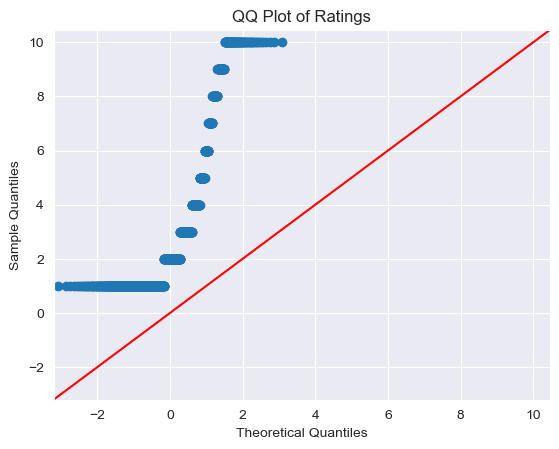

In [269]:
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'rating' is your numeric column
ratings = df_transform['rating'].dropna()  # Drop NaN values

# QQ plot
sm.qqplot(ratings, line ='45')
plt.title('QQ Plot of Ratings')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


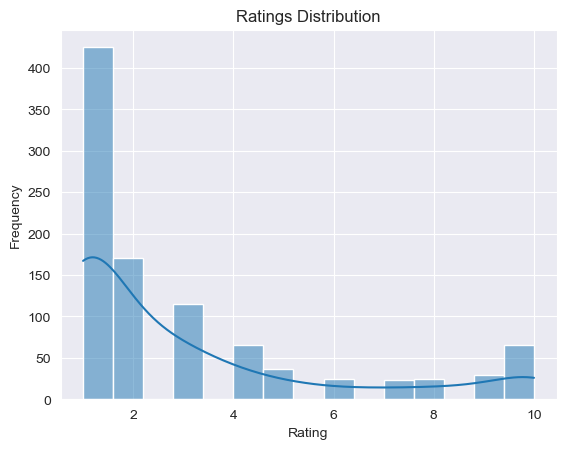

Statistics=0.736, p=0.000
Sample does not look Gaussian (reject H0)


In [268]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Assuming 'rating' is your numeric column
ratings = df_transform['rating'].dropna()  # Drop NaN values

# Visual Inspection: Histogram
sns.histplot(ratings, kde=True)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(ratings)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


* Skewness Test.

In [271]:
from scipy.stats import skew

# Assuming 'rating' is your numeric column
ratings = df_transform['rating'].dropna()  # Drop NaN values

# Calculate skewness
ratings_skewness = skew(ratings)
print('Skewness: %.3f' % ratings_skewness)

# Interpretation
if -0.5 <= ratings_skewness <= 0.5:
    print("The distribution is approximately symmetric.")
elif ratings_skewness > 0.5:
    print("The distribution is positively skewed.")
else:
    print("The distribution is negatively skewed.")


Skewness: 1.428
The distribution is positively skewed.


* Shapiro-Wilk Test.

In [270]:
# Shapiro-Wilk Test
stat, p = shapiro(ratings)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
alpha = 0.05
if p > alpha:
    print('The sample appears to be normally distributed')
    print('Suggestion: Suitable for parametric methods.')
else:
    print('The sample does not appear to be normally distributed ')
    print('Suggestion: Consider using non-parametric methods.')


Statistics=0.736, p=0.000
The sample does not appear to be normally distributed 
Suggestion: Consider using non-parametric methods.


## **3.5.Address RQ and Test Null Hypotesis**

The RQ to be consider is: **What factors most significantly affect customer choices in airline travel?**

| RQ 1 |                            |
| --- | -------------------------- |
| **H0:** There is not significantly influenced between Customer choices in airline travel on any specific factors such as Flying_month, rating, class, and traveller type | 
| **H1:** There is significantly influenced between Customer choices in airline travel on any specific factors such as Flying_month, rating, class, and traveller type |


In [273]:
import scipy.stats as stats
# Ensure 'rating' is numeric
df_transform['rating'] = pd.to_numeric(df_transform['rating'], errors='coerce')
df_transform.dropna(subset=['rating'], inplace=True)
# Kruskal-Wallis Test for Flying_month
flying_month_groups = [group['rating'].values for name, group in df_transform.groupby('flying-month')]
flying_month_kruskal = stats.kruskal(*flying_month_groups)

# Kruskal-Wallis Test for Class
class_groups = [group['rating'].values for name, group in df_transform.groupby('class')]
class_kruskal = stats.kruskal(*class_groups)

# Kruskal-Wallis Test for Traveller-type
traveller_type_groups = [group['rating'].values for name, group in df_transform.groupby('traveller-type')]
traveller_type_kruskal = stats.kruskal(*traveller_type_groups)

# Results and Interpretation
alpha = 0.05
print("Kruskal-Wallis Test for Flying_month: H-Statistic=%.3f, p-value=%.3f" % (flying_month_kruskal.statistic, flying_month_kruskal.pvalue))
print("Kruskal-Wallis Test for Class: H-Statistic=%.3f, p-value=%.3f" % (class_kruskal.statistic, class_kruskal.pvalue))
print("Kruskal-Wallis Test for Traveller-type: H-Statistic=%.3f, p-value=%.3f" % (traveller_type_kruskal.statistic, traveller_type_kruskal.pvalue))
if flying_month_kruskal.pvalue < alpha:
    print('Significant influence of Flying_month on ratings.')
else:
    print('No significant influence of Flying_month on ratings.')
if class_kruskal.pvalue < alpha:
    print('Significant influence of Class on ratings.')
else:
    print('No significant influence of Class on ratings.')
if traveller_type_kruskal.pvalue < alpha:
    print('Significant influence of Traveller-type on ratings.')
else:
    print('No significant influence of Traveller-type on ratings.')

Kruskal-Wallis Test for Flying_month: H-Statistic=11.201, p-value=0.427
Kruskal-Wallis Test for Class: H-Statistic=3.943, p-value=0.268
Kruskal-Wallis Test for Traveller-type: H-Statistic=6.013, p-value=0.111
No significant influence of Flying_month on ratings.
No significant influence of Class on ratings.
No significant influence of Traveller-type on ratings.


* Explantion of the results

| Factor        | Kruskal-Wallis Test Result | Decision                          | H0 Acceptance                        |
|---------------|----------------------------|-----------------------------------|--------------------------------------|
| Flying_month  | H=11.201, p=0.427          | Fail to Reject H0 (Not Significant)| Accept H0: No significant influence  |
| Class         | H=3.943, p=0.268           | Fail to Reject H0 (Not Significant)| Accept H0: No significant influence  |
| Traveller-type| H=6.013, p=0.111           | Fail to Reject H0 (Not Significant)| Accept H0: No significant influence  |


* Final conclusion.

| RQ 1 | Named Result | 
| --- | ------------ |
| **H0:** There is not a significant influence between Customer choices in airline travel on any specific factors such as Flying_month, rating, class, and traveller type | ACCEPTED |
| **H1:** There is a significant influence between Customer choices in airline travel on any specific factors such as Flying_month, rating, class, and traveller type | REJECTED |


In [1]:
!pip install notebook